In [1]:
import csv
import numpy as np
# import xlsxwriter
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import sys
#from tabulate import tabulate
import os
from matplotlib.animation import FuncAnimation
# from xlsxwriter import Workbook
# get_ipython().run_line_magic('matplotlib', 'inline')
import glob
import pickle
import scipy
import shutil
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# from ASCID_variable import *

In [3]:
def label(x,y,a,b,pur="all"):
    plt.xlabel(x,fontsize=18)
    plt.ylabel(y,fontsize=18)
    if pur=="all":
        plt.rcParams['figure.figsize'] = [a,b]
    elif pur=="chi2":
        plt.title("Chi2 Analysis, S-%s, Channel %s"%(a,b), fontsize=20)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    return 
def gaus_fit(ri,rf,fx,fy,nm="norm"):
    from scipy.optimize import curve_fit
    def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))
    from scipy.stats import chisquare
    b=len(bins)-1
    hist_PI=[]
    for j in range(b):
        if ri<=bins[j]<=rf:                                                          #Bins range for gauss fit
            hist_PI.extend([j])
    x=bins[hist_PI]+(bins[1]-bins[0])/2
    y=n[hist_PI]
    l = len(x)
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))#the number of data
    popt,pcov = curve_fit(gaus,x,y, p0=[max(y), mean, sigma])
    m=x[1]-x[0]
    X=np.arange(x.min(),x.max(),m/10)
#     chi2=chisquare(n[hist_PI],f_exp=gaus(x,*popt))
#     b=chi2[0]/(len(hist_PI)-3)
    if nm=="norm":
        textstr = '\n'.join((
        r'$\mu=%.2f \pm %.2f$ ADC' % (popt[1], np.sqrt(pcov[1,1])),
        r'$\sigma=%.2f \pm %.2f$ ADC' % (popt[2], np.sqrt(pcov[2,2]))
        ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
    elif nm=="keV":
        textstr = '\n'.join((
            r'$\mu=%.2f \pm %.1f$ keV' % (popt[1], np.sqrt(pcov[1,1])),
            r'$\sigma=%.2f \pm %.1f$ keV' % (popt[2], np.sqrt(pcov[2,2]))
            )) 
    elif nm=="keV_br":
        textstr = '\n'.join((
            r'$\mu=%.2f \pm %.2f$ eV' % (popt[1]*1000, np.sqrt(pcov[1,1])*1000),
            r'$\sigma=%.2f \pm %.2f$ eV' % (popt[2]*1000, np.sqrt(pcov[2,2])*1000)
            ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(fx, fy, textstr, fontsize=12,
             
             verticalalignment='top', bbox=props)
    return popt[0], popt[1],popt[2],plt.plot(X,gaus(X,*popt),'r')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],int(y[i]),fontsize=12)

In [16]:
N_det=26+11
Det_Comb=21

energyThreshold = 100
timeWindow=5e-7
Date="103024"
         #Not required if you are doing the full run. 
#first cut_data event or 2nd, Ex: index=0 means collecting first 60 second of data and 
                                 #index=1 means collecting second 60 second of data and so on...     
# run_index=0      #int(sys.argv[1])    #Type the index of run mentioned in the data file, required while taking multiple dataset 


activity = 1.47
cut_data= 900               #Select the required second of data
read_folder_all=glob.glob("E:/RUN5/Cs137/DAQ/CsI_Sc46_*")                   #reading data folder
Total_folder = len(read_folder_all)
read_folder_all.sort(key=lambda x: os.stat(x).st_ctime)
folder_index = 0
read_folder= read_folder_all[folder_index]            #glob.glob("../RUN4/Sc46/DAQ/*")
save_folder="../RUN5/Cs137//Figures/Take4" 

print(f"Folder name {read_folder_all[folder_index]}")
index=0

innerChannel=np.arange(16,26)

date="%s"%(Date)
serial=np.array(["1st","2nd","3rd","4th","5th","6th", "7th", "8th"])
save_folder_each = os.path.join(save_folder, "Folder_%d"%folder_index)

Folder name ../RUN5/Cs137/DAQ\CsI_Cs137_Take4


In [96]:
save_folder_each = "../RUN5/Na22/Figures/Take4/Folder_0"

In [7]:
files = glob.glob('%s/RAW/*.CSV'%read_folder)
files=natsorted(files)#[0:26]
# files = files
# print(files)
MinTime=np.zeros(N_det)
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if line_count == 0:
            MinTime[nf] = float(row[2]) * 1e-12
            break
minTime=np.min(MinTime)


# In[5]:

data=[]
for j in range(3):                                     #3=channel, time, calib. energy
    b=[]
    data.append(b)
nEvent=np.zeros(len(files))
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if float(row[2])*1e-12 - minTime>=cut_data*index:
            data[0].append(int(row[1]))
            data[1].append(float(row[2])*1e-12 - minTime)
            data[2].append(float(row[3]))     # row[4] = Caliberated energy, row[3] = ADC energy sometime, else row[3] = Caliberated energy
            line_count += 1
            # if line_count%1000000==0:
            #     print("%d M data loaded"%int(line_count/1000000))
            if float(row[2])*1e-12 - minTime>cut_data*(index+1):
                data[0].pop()
                data[1].pop()
                data[2].pop()
                break
    nEvent[nf]=line_count-1
    print("file %d done"%nf)
nEvents=int(nEvent.sum())



Data_Time=round((data[1][nEvents-1]-data[1][0]),0)
print("Total Time for this data set is %d s"%Data_Time)

file 0 done
file 1 done
file 2 done
file 3 done
file 4 done
file 5 done
file 6 done
file 7 done
file 8 done
file 9 done
file 10 done
file 11 done
file 12 done
file 13 done
file 14 done
file 15 done
file 16 done
file 17 done
file 18 done
file 19 done
file 20 done
file 21 done
file 22 done
file 23 done
file 24 done
file 25 done
file 26 done
file 27 done
file 28 done
file 29 done
file 30 done
file 31 done
file 32 done
file 33 done
file 34 done
file 35 done
file 36 done
Total Time for this data set is 900 s


In [13]:
nEvents

15466771

In [388]:
data=np.array(data).T
data=data[data[:, 1].argsort()]
data=np.array(data).T

In [389]:
time_diff = []
for j in range(nEvents-1):
    time_diff.append(data[1][j+1] - data[1][j])

In [359]:
save_folder_each

'../RUN5/Sc46/Figures/Take4_2/NewLength/Sc46_3'

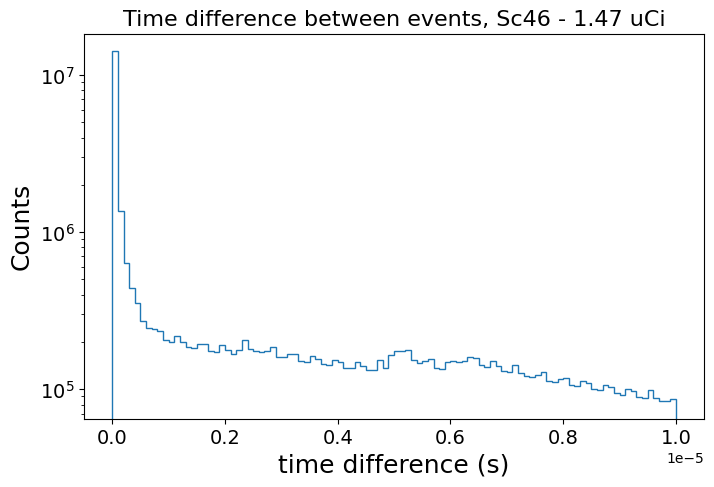

In [390]:
plt.hist(time_diff, bins = np.arange(0, 1e-5, 1e-7), histtype = "step")
label("time difference (s)", "Counts", 8, 5)
plt.yscale("log")
plt.title("Time difference between events, Sc46 - %.2f uCi"%activity, fontsize = 16)
plt.savefig("%s/Timediff_part.jpg"%(save_folder_each))

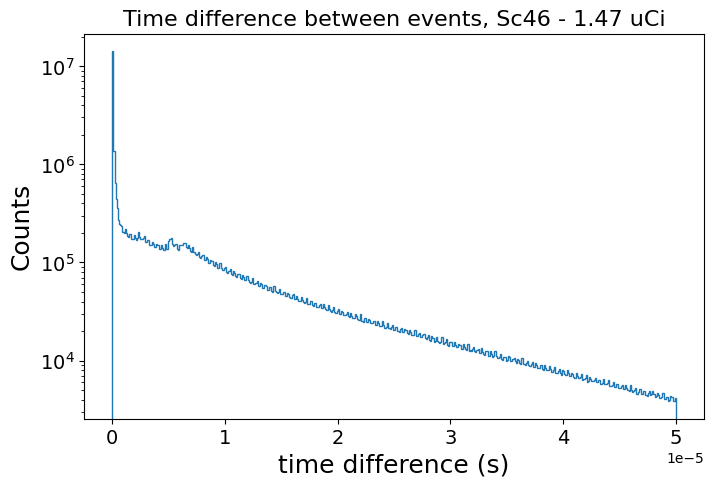

In [391]:
plt.hist(time_diff, bins = np.arange(0, 5e-5, 1e-7), histtype = "step")
label("time difference (s)", "Counts", 8, 5)
plt.yscale("log")
plt.title("Time difference between events, Sc46 - %.2f uCi"%activity, fontsize = 16)
plt.savefig("%s/Timediff_full.jpg"%(save_folder_each))

In [8]:
nEvents = len(data[0])
energyPlot=[[] for _ in range(26)]
for i in range(nEvents):
    if data[0][i] < 26:
        energyPlot[int(data[0][i])].extend([data[2][i]])

In [9]:
mean=np.zeros((26,2))
sigma=np.zeros((26,2))

In [30]:
save_folder

'../RUN5/Sc46/Figures/Take4_2'

In [44]:
f = open('%s/Efficiency_Final1.pickle'%save_folder, 'rb')
dat = pickle.load(f)
popt = dat['Fit_parameter']['popt']

In [38]:
# dat['Fit_Function']
def efficiency(z, a, b, c, d):
    return a*scipy.special.erf(d*z-c)+b

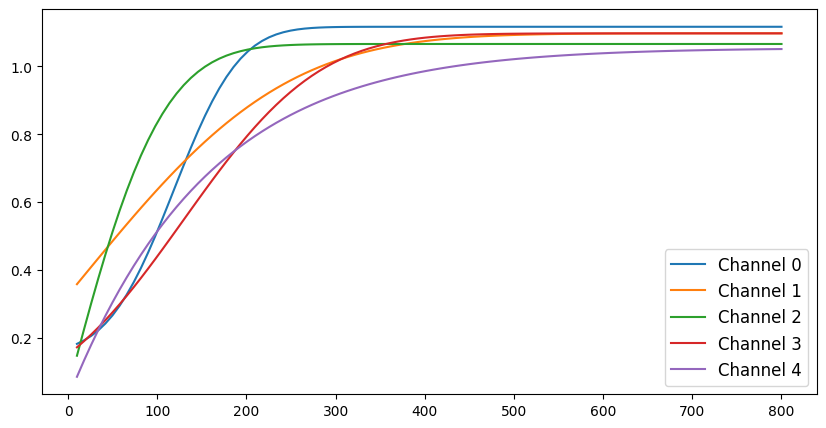

In [52]:
x = np.linspace(10, 800, 100)
for i in range(5):
    plt.plot(x, efficiency(x, *popt[i]), label = 'Channel %d'%i)
    plt.legend(fontsize = 12)      #Channel 2 is the good one

In [86]:
f = open('%s/Sigma_Mu_ratio_R5.pickle'%(save_folder), 'wb')
Parameter={'Constants':popt_new, 'Function': 'c + d /sqrt(N)'}
pickle.dump(Parameter, f)
f.close()

In [91]:
popt_new[0][0]

0.051920538053223525

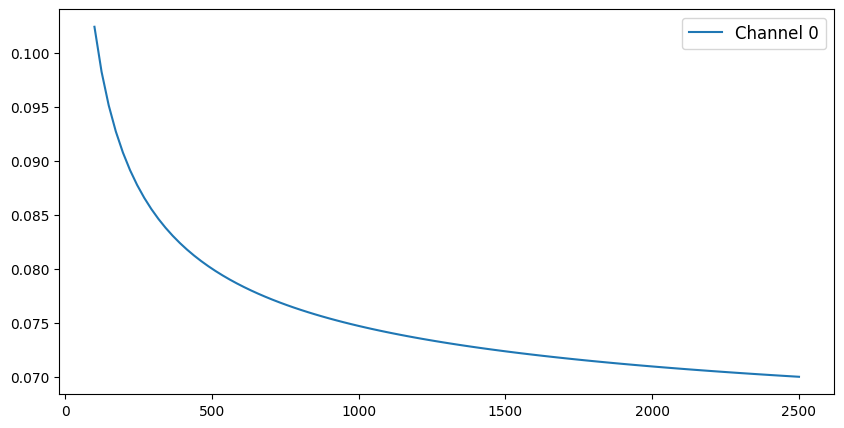

In [70]:
f = open('%s/Sigma_Mu_ratio.pickle'%save_folder, 'rb')
dat = pickle.load(f)

def resolution(N, c, d):
    return c + d /np.sqrt(N)

constants = dat['Constants']

x = np.linspace(100, 2500, 100)
for i in range(1):
    plt.plot(x, resolution(x, *constants[i][0]), label = 'Channel %d'%i)
    plt.legend(fontsize = 12)      #Channel 2 is the good one

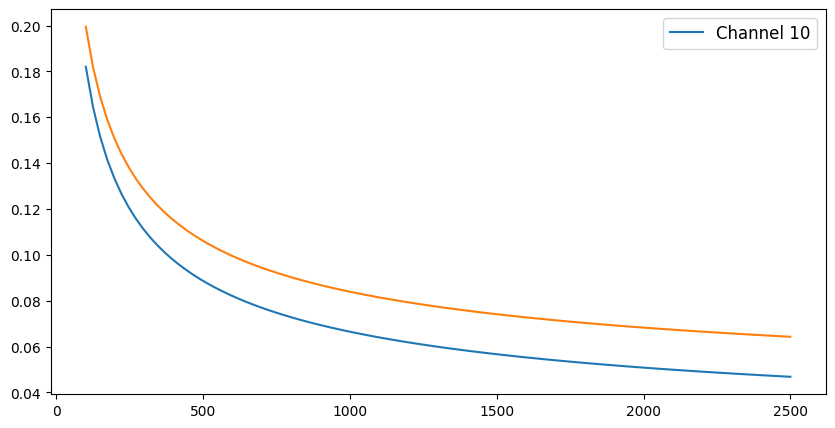

In [81]:
popt_new = np.zeros((26, 2))
for i in range(26):
    extra = resolution_now[i]*0.01 - resolution(1120, *constants[i][0])
    c = constants[i][0][0] + extra
    popt_new[i, 0],  popt_new[i, 1] = c, constants[i][0][1]
    
x = np.linspace(100, 2500, 100)
i = 10
plt.plot(x, resolution(x, *popt_new[i]), label = 'Channel %d'%i)
plt.plot(x, resolution(x, *constants[i][0]))
plt.legend(fontsize = 12)      #Channel 2 is the good one

In [76]:
c

0.012509481132233739

In [63]:
resolution_now = np.array([6.4, 6.06, 7.1, 6.19, 7.31, 
                          4.54, 7.54, 5.91, 7.34, 6.4,
                          6.35, 4.56, 7.67, 8.12, 8.46, 
                          6.14, 5.07, 6.86, 7.26, 6.72, 
                          6.04, 7.07, 5.17, 6.32, 5.86, 5.96])

In [18]:
f = open('%s/../DataInfo_Run.pickle'%save_folder, 'rb')
dat = pickle.load(f)
mean=dat['mean']
# sigma=dat['sigma']
# bin_last = dat['bin_last']

# gaus_x = dat["gaus_x"]
# gaus_y = dat["gaus_y"]
f.close()

In [27]:
index

0

In [28]:
f = open('%s/Calibration_parameter_folder%d_index%d.pickle'%(save_folder_each, folder_index, index), 'wb')
Parameter={'mean':mean}
pickle.dump(Parameter, f)
f.close()

In [25]:
f = open('%s/DataInfo_Run.pickle'%(save_folder), 'wb')
Parameter={'mean':mean}
pickle.dump(Parameter, f)
f.close()

In [15]:
save_folder

'../RUN5/Sc46/Figures/Take4_2'

In [13]:
mean[:,0] = np.array([45, 65, 78, 65, 55,       70, 65, 110, 60, 80,      50, 130, 110, 40, 140,      40, 70, 65, 65, 80,      65, 65, 75, 40, 120, 150])

In [67]:
Mean = np.zeros(26)

In [13]:
save_folder

'../RUN5/Sc46/Figures/Take4_2'

In [20]:
1132/889*230

292.86839145106865

In [19]:
Mean = np.zeros(26)

In [17]:
for k in range(26):
    bin_last=mean[k, 0]*2
    bin_start = 4 if mean[k, 0] < 40 else 10
    bin_w = 1 if mean[k, 0] < 40 else 2
    n,bins, patches=plt.hist(energyPlot[k], bins=np.arange(bin_start,bin_last,bin_w), histtype="step", label="%d events"%len(energyPlot[k]))
    label("Energy (ADC)", "Counts", 10,5)
    # plt.yscale("log")
    plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Background)"%k, fontsize=16)
    plt.savefig("%s/Pulse/EnergyCal_Ch%d.jpg"%(save_folder_each,k))
    plt.close()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import find_peaks, savgol_filter


for k in range(26):
    bin_last=mean[k, 0]*2
    bin_start = 4 if mean[k, 0] < 40 else 10
    bin_w = 1 if mean[k, 0] < 40 else 2
    n,bins, patches=plt.hist(energyPlot[k], bins=np.arange(bin_start,bin_last,bin_w), histtype="step", label="%d events"%len(energyPlot[k]))
    label("Energy (ADC)", "Counts", 10,5)
    # plt.yscale("log")
    plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Background)"%k, fontsize=16)
    
    
    # Assuming 'bins' and 'n' are your original data
    x = bins[1:]
    y = n
    
    # Apply smoothing to the data using Savitzky-Golay filter (or you can use moving average as well)
    window_size = int(bin_last/15)  # Window size for smoothing, should be odd
    y_smooth = savgol_filter(y, window_size, polyorder=3)
    
    # Find the minimum value of the spectrum
    min_value = np.min(x)
    max_value = np.max(x)
    
    # Define the threshold as 20% of the minimum value
    threshold = 0.4 * max_value + min_value 
    
    # Create a mask to select the data points where y is greater than 20% of the minimum value
    mask = x >= threshold
    
    # Subset the data starting from the point where the values are above the threshold
    x_subset = x[mask]
    y_subset = y_smooth[mask]
    
    # Find peaks in the subset of the data
    peaks, _ = find_peaks(y_subset, distance=10, height=0)  # Adjust distance to ensure separation
    
    # If no peaks are found, you can handle it accordingly
    if len(peaks) > 0:
        # Get the index of the single highest peak in the subset
        top_peak_idx = np.argmax(y_subset[peaks])
        peak_x = x_subset[peaks[top_peak_idx]]
        peak_y = y_subset[peaks[top_peak_idx]]
    else:
        peak_x = None
        peak_y = None
    
    # Print the results
    print(f"Peak found at x = {peak_x}, y = {peak_y}")
    
    textstr = r'$\mu=%d $ ADC' %(peak_x)                        #"r'$\chi^2/Dof=%.2f$' % (b, )"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(peak_x, peak_y/2, textstr, fontsize=12,
             verticalalignment='top', bbox=props)
    
    # Plot the original data, smoothed data, and the detected peak
    # plt.plot(x, y, label='Original Data', alpha=0.5)
    plt.plot(x, y_smooth, label='Smoothed Data', color='orange', linewidth=2)
    if peak_x is not None:
        plt.scatter(peak_x, peak_y, color='red', label='Detected Peak', zorder=5)
    plt.legend()
    # plt.yscale("log")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Peak Detection, channel %d'%k)
    # plt.show()
    plt.savefig("%s/Pulse/Energy_Ch%d.jpg"%(save_folder_each,k))
    Mean[k] = peak_x
    plt.close()

Peak found at x = 90.0, y = 25348.748917748882
Peak found at x = 84.0, y = 54177.718750000015
Peak found at x = 80.0, y = 21641.468750000004
Peak found at x = 102.0, y = 43942.48750000013
Peak found at x = 80.0, y = 22765.812500000004
Peak found at x = 80.0, y = 54453.656250000015
Peak found at x = 96.0, y = 23476.937500000073
Peak found at x = 50.0, y = 77085.14285714287
Peak found at x = 144.0, y = 18300.273809523882
Peak found at x = 200.0, y = 17726.998484848595


In [22]:
mean[:,0] = Mean
mean[:,1] = np.zeros(26)

In [41]:
save_folder_try =  '../RUN5/Sc46/Figures/Take4_2/try'

In [43]:
Mean = np.zeros((26, 2))

In [45]:
for k in range(25):
    bin_last=mean[k, 0]*1.8
    bin_start = 4 if mean[k, 0] < 40 else 10
    bin_w = 1 if mean[k, 0] < 40 else 2
    n,bins, patches=plt.hist(energyPlot[k], bins=np.arange(bin_start,bin_last,bin_w), histtype="step", label="%d events"%len(energyPlot[k]))
    label("Energy (ADC)", "Counts", 10,5)
    # plt.yscale("log")
    plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Background)"%k, fontsize=16)
    
    x = bins[1:]
    y = n
    
    # Apply smoothing to the entire dataset using Savitzky-Golay filter
    # Use a relatively large window size to smooth out small fluctuations but preserve peaks
    y_smooth = savgol_filter(y, window_length=9, polyorder=3)
    
    # Find the index where 40% of the data lies
    start_index = int(0.4 * len(x))
    
    # Subset the smoothed data to include only values after 40%
    x_subset = x[start_index:]
    y_subset_smooth = y_smooth[start_index:]
    
    # Find peaks in the smoothed subset of data (after 40%)
    # We will use the prominence criterion to select well-separated peaks
    min_prominence = 0.2  # Minimum prominence to filter out small fluctuations (adjust this)
    min_distance = 3  # Minimum number of data points between peaks to ensure they are well-separated
    
    peaks, properties = find_peaks(y_subset_smooth, prominence=min_prominence, distance=min_distance)
    
    # Ensure we only pick the two most prominent peaks
    peak_prominences = properties['prominences']
    top_peaks_idx = np.argsort(peak_prominences)[-2:]  # Get indices of the two highest peaks
    
    # Get the x and y values of the top two highest peaks
    top_peaks = peaks[top_peaks_idx]
    x_peaks = x[start_index:][top_peaks]  # Adjust the peak indices to the original x-values
    y_peaks = y_smooth[start_index:][top_peaks]  # Adjust the peak indices to the smoothed y-values
    
    x_peak_sort = np.sort(x_peaks)
    
    textstr = r'$\mu1=%d $ ADC' %(x_peak_sort[0])                        #"r'$\chi^2/Dof=%.2f$' % (b, )"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(x_peak_sort[0], max(y)/1.5, textstr, fontsize=12,
             verticalalignment='top', bbox=props)
    
    
    # Plot the original and smoothed data, and mark the detected peaks
    # plt.plot(x, y, label='Original Data', alpha=0.5)
    plt.plot(x, y_smooth, label='Smoothed Data', color='orange', linewidth=2)
    plt.scatter(x_peaks, y_peaks, color='red', label='Detected Peaks', zorder=5)
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Peak Detection After 40%% of the Smoothed Data, Channel %d'%k)
    plt.savefig("%s/Energy_Ch%d.jpg"%(save_folder_try,k))
    Mean[k, :] = x_peak_sort
    plt.close()
# # Print the x and y values of the detected peaks
# print(f"Detected top two prominent peaks at x-values: {x_peaks}")


In [46]:
mean[14, :]

array([59., 75.])

In [ ]:
bin_w=np.array([2,2,2,2,2,    2,2,2,2,2,    2,2,2,2,2,   2,2,2,2,2,  2,2,2,2,2,  2])

In [ ]:
bin_last = np.array([150, 300, 150, 100, 200,       200, 150, 400, 200, 300,       100, 250, 250, 500, 160, 
                     150, 200, 150, 150, 250,       200, 170, 200, 250, 300, 200])

In [81]:
gaus_x = np.array([[ 75, 160,  68,  47,  95,        99,  72, 195, 82, 132,        52, 145, 140, 190,  66,  
                     68, 110,  77,  72, 106,         80, 90,  92, 125, 190, 81],
                    [97, 200,  92,  62,  125,        122,  92, 235, 110, 165,       68, 175, 167, 225,  85,  
                     92, 136,  95,  95, 132,         100, 110,  115, 155, 232, 102]])

gaus_y = np.array([[100, 210,  92,  61, 125,         125,  94, 245, 110, 170,        65, 184, 180, 240,  85,  
                    92, 140,  100,  94, 136,          102, 115, 120, 160, 245, 105],
                   [125, 250, 120,  80, 155,         150, 120, 300, 140, 210,        84, 220, 210, 300, 115, 
                    115, 180, 120, 120, 165,         125, 140, 145, 195, 290, 130]])

In [13]:
source = "Sc46"

In [25]:
1132/889

1.2733408323959505

In [37]:
mean[k,0], mean[k,1] = 55, 55*1.27

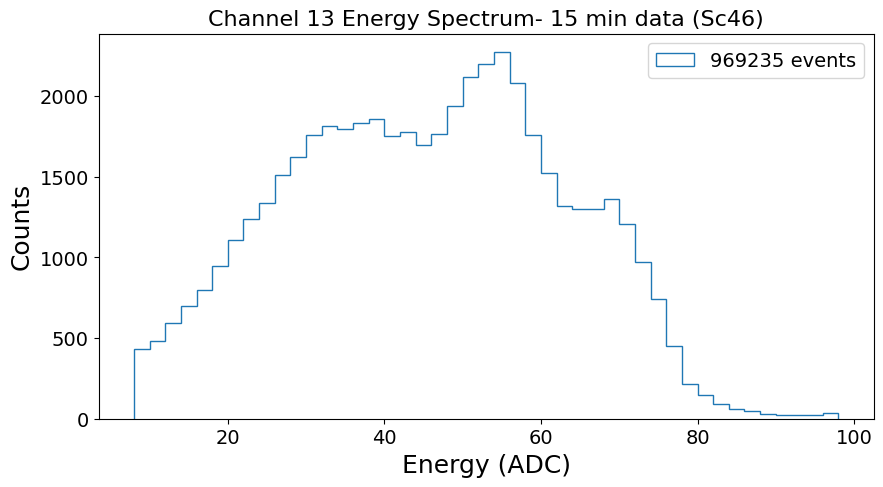

In [36]:
#### k=15
Energy_feature = [[] for _ in range(26)]
for k in range(13, 14):
    # bin_last=np.array([500,500,300,150,300,   250,200,500,300,300,    150,350,500,700,200,    200,300,230,200,350,   200,250,300,350,500,  400])
    bin_last=100 # mean[k, 0]*1.8
    bin_w=np.array([2,2,2,2,2,    2,2,2,2,2,    2,2,2,2,2,   1,2,2,2,2,  2,2,2,2,2,  2])
    # n1,bins1,patches=plt.hist(SmEnergy[k], bins=np.arange(10,bin_last[k],bin_w[k])*13, histtype="step", label="%d events"%len(SmEnergy[k]))
    nevent = len(energyPlot[k])
    n,bins, patches=plt.hist(energyPlot[k][0:int(nevent/10)], bins=np.arange(8,bin_last,bin_w[k]), histtype="step", label="%d events"%len(energyPlot[k]))
    label("Energy (ADC)", "Counts", 10,5)
    # plt.yscale("log")
    Energy_feature[k].extend([n])
    Energy_feature[k].extend([bins])
    plt.title(r"Channel %d Energy Spectrum- 15 min data (%s)"%(k, source), fontsize=16)

    # try:
    #     a1, mean[k,0],sigma[k,0], fig = gaus_fit(gaus_x[0][k],gaus_x[1][k],bin_last[k]/3,max(n)-max(n)/10)
    #     a2, mean[k,1],sigma[k,1], fig=gaus_fit(gaus_y[0][k],gaus_y[1][k],bin_last[k]/1.5,max(n)-max(n)/2)
    # except:
    #     pass
    # Energy_feature[k].extend([a1, mean[k,0],sigma[k,0], a2, mean[k,1],sigma[k,1]])
    plt.legend(fontsize=14)
    # plt.savefig("%s/Energy_Ch%d.jpg"%(save_folder_each,k))
    # plt.close()
    # print("%d done"%k)

In [143]:
save_folder = '../RUN5/Sc46/Figures/Take4'

In [259]:
Mean

array([ 80., 112., 132.,  98.,  90., 116., 104., 194.,  98., 146.,  82.,
       214., 184.,  62., 230.,  64., 116., 104., 100., 136., 102., 104.,
       126.,  66., 222., 248.])

In [365]:
# data=np.array(data).T
# data=data[data[:, 1].argsort()]
# data=np.array(data).T

# folder_index =533
energy_source = 889
# save_folder_each = "%s/Folder_%d"%(save_folder, folder_index)

# f = open('%s/Calibration_parameter_folder%d_index%d.pickle'%(save_folder_each, folder_index, index), 'rb')
# dat = pickle.load(f)
# mean=dat['Mean']
# f.close()

nEvents = len(data[0])
for j in range(nEvents):
    if data[0][j]<26:
        data[2][j]=data[2][j]/Mean[int(data[0][j])]*energy_source
print("Calibration done")

Calibration done


In [366]:
data_process = np.array(data).T
N_det_panel = 11
N_det_CsI = 26
energyThreshold_CsI = 100    #in keV
energyThreshold_Veto = 8 #in ADC, equivalent ~120 keV
energyThreshold = [energyThreshold_CsI, energyThreshold_Veto]
# Threshold arrays
Veto_threshold = np.ones(N_det_panel) * energyThreshold[1]
Threshold_CsI = np.ones(N_det_CsI) * energyThreshold[0]
Threshold_null = np.zeros(15)
Threshold = np.concatenate((Threshold_CsI, Threshold_null, Veto_threshold))

# Boolean mask to filter rows that meet the threshold condition
mask = data_process[:, 2] > Threshold[data_process[:, 0].astype(int)]

# Filtered data without intermediate list creation
data = data_process[mask, :3].T

In [367]:
nEvents = len(data[0])
csiCh = np.arange(26)
innerCh=np.arange(16,26,1)
VetoCh = np.arange(41, 52, 1)
timeWindow = 5e-7
Sig_index=-1
eventTime=0
Timed_Energy_event=[]
for j in range(nEvents):
    if  data[1][j]>eventTime+2*timeWindow and data[0][j] in csiCh:   #Avoiding center detector overlap
        eventTime=data[1][j]
        eventChannel=int(data[0][j])
        Ev_indx=j
        Sig_index+=1
        EventEnergy=data[2][j]
        a=[]
        a.extend([Ev_indx])
        
        while Ev_indx>0 and abs(data[1][Ev_indx-1]-eventTime)<=timeWindow:
            Ev_indx-=1
            a.extend([Ev_indx])
        Ev_indx=j
        
        while Ev_indx<nEvents-1 and abs(data[1][Ev_indx+1]-eventTime)<=timeWindow:
            Ev_indx+=1    
            a.extend([Ev_indx])
        a = np.unique(np.sort(a)) # a contains the index within the defined coincidence window
        Timed_Energy_event.extend([a])
# Timed_Energy_event = Timed_Energy_event
# Timed_Energy_event=[]
print("data coincidence done")

data coincidence done


In [221]:
len(Timed_Energy_event), timeWindow

(16365633, 5e-07)

In [368]:
sl=[]
VetoCh_set = set(VetoCh)
count = 0
Multiplicity = np.zeros(100)
event_1d = []
event_1d_channel = [[] for _ in range(26)]
count_1d_channel = np.zeros(26)
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    multiplicity = len(j)
    Multiplicity[multiplicity]+=1
    vetoMatch = VetoCh_set.intersection(event_Channel)
    if not vetoMatch and len(j) == 1:
        event_1d.extend(event_Energies)
        event_1d_channel[int(event_Channel)].extend(event_Energies)
        count_1d_channel[int(event_Channel)]+=1
event_1d = np.array(event_1d)

C:\Users\sharada\AppData\Local\Temp\ipykernel_31628\675728402.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  event_1d_channel[int(event_Channel)].extend(event_Energies)
C:\Users\sharada\AppData\Local\Temp\ipykernel_31628\675728402.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  count_1d_channel[int(event_Channel)]+=1


In [369]:
save_folder_each 

'../RUN5/Sc46/Figures/Take4_2/NewLength/Sc46_3'

In [370]:
for i in range(26):
    n,bins,patches=plt.hist(event_1d_channel[i], bins=np.arange(0,2500,2/mean[i, 0]*889),label="%d events"%len(event_1d_channel[i]), histtype="step")
    plt.legend(fontsize=15)
    label("Energy (keV)", "Counts", 8, 5)
    # n1det_energy[i]=n
    plt.title("1 detector: Energy Spectrum, Channel %d "%i, fontsize=16)
    plt.savefig("%s/Pulse/Energy-1Det_Ch%d.jpg"%(save_folder_each,i))
    plt.close()

In [92]:
len(event_1d)/len(Timed_Energy_event)

0.15956335553803758

In [95]:
timeWindow

5e-07

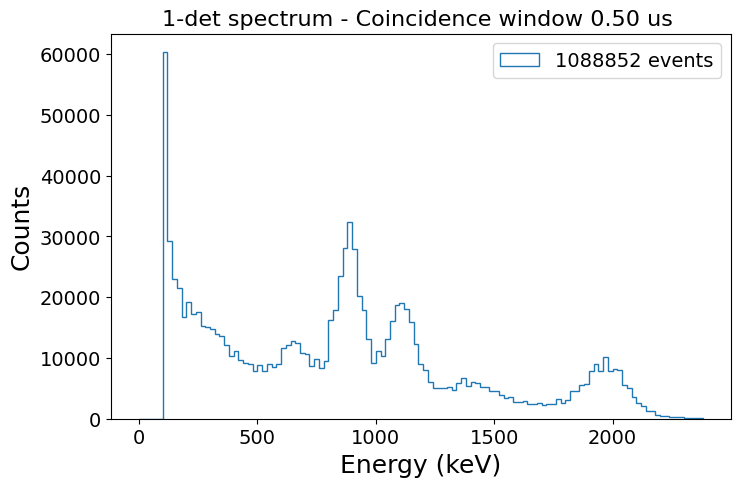

In [371]:
n,bins, patches=plt.hist(event_1d, bins=np.arange(0,2400, 20), histtype="step", label="%d events"%len(event_1d))
label("Energy (keV)", "Counts", 10,5)
plt.title("1-det spectrum - Coincidence window %.2f us "%(timeWindow*1e6), fontsize = 16)
plt.legend(fontsize = 14)
# plt.yscale("log")
plt.savefig("%s/Energy_1det-%dns.jpg"%(save_folder_each, timeWindow*1e9))

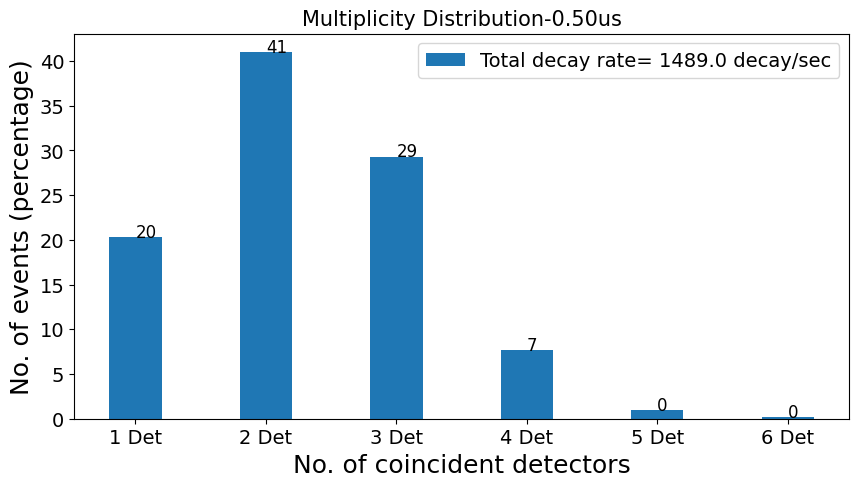

In [372]:
count = Multiplicity

total = count.sum()
count=count/count.sum()*100
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(cut_data)))   #Change time here
addlabels(courses, values)
plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution-%.2fus"%(timeWindow*1e6), fontsize="15")
plt.savefig("%s/Multiplicity-%dns.jpg"%(save_folder_each, timeWindow*1e9))

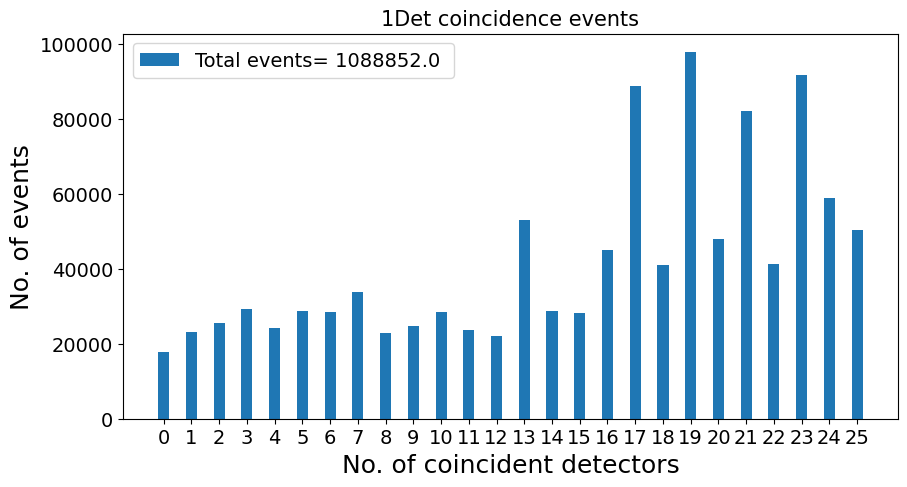

In [373]:
count1_ch=np.array(count_1d_channel, dtype=int) 
    
data_count = {'0':count1_ch[0], '1':count1_ch[1], '2':count1_ch[2],
        '3':count1_ch[3], '4':count1_ch[4], '5':count1_ch[5], '6':count1_ch[6],
             '7':count1_ch[7], '8':count1_ch[8], '9':count1_ch[9], '10':count1_ch[10],
             '11':count1_ch[11], '12':count1_ch[12], '13':count1_ch[13], '14':count1_ch[14],
             '15':count1_ch[15], '16':count1_ch[16], '17':count1_ch[17], '18':count1_ch[18],
             '19':count1_ch[19], '20':count1_ch[20], '21':count1_ch[21], '22':count1_ch[22],
             '23':count1_ch[23], '24':count1_ch[24], '25':count1_ch[25]}
courses = list(data_count.keys())
values = list(data_count.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values,
        width = 0.4, label="Total events= %.1f "%(count1_ch.sum()))   #Change time here
plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events", 8, 5)
plt.title("1Det coincidence events", fontsize="15")
plt.savefig("%s/CountEvents-1det.jpg"%(save_folder_each))

In [374]:
sl=[]
VetoCh_set = set(VetoCh)
min_val = 889-1.2*77
max_val = 889+1.2*77
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    vetoMatch = VetoCh_set.intersection(event_Channel)
    if not vetoMatch:
        if any(min_val <= element <= max_val for element in event_Energies):
            sl.extend([k])

In [375]:
energy_exclusive = []
multipliciy_889 = np.zeros(N_det_CsI)
for k in range(len(sl)):
    j = Timed_Energy_event[sl[k]]
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    count_select = 0
    for element in event_Energies:
        if min_val <= element <= max_val:
            energy_select = element
            count_select+=1
    energy_rest = sum(event_Energies) - energy_select
    energy_exclusive.extend([energy_rest])
    multipliciy_889[len(j)]+=1

In [376]:
min_val_1132 = 1132-1.2*94
max_val_1132 = 1132+1.2*94

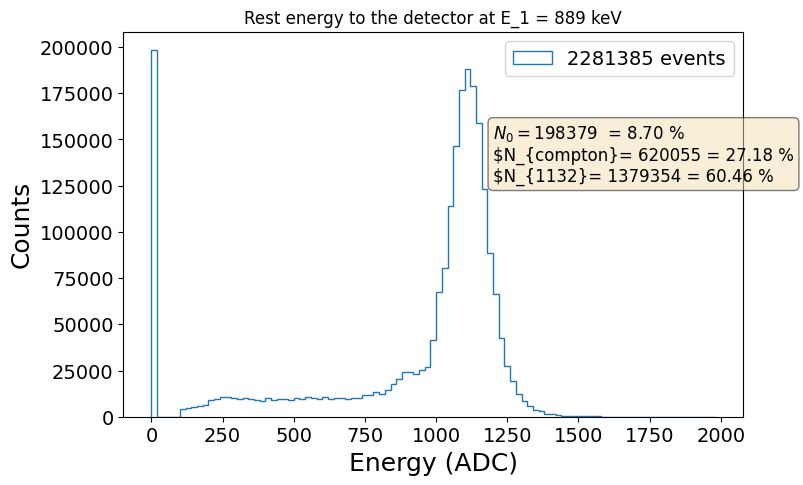

In [377]:
n,bins, patches=plt.hist(energy_exclusive, bins=np.arange(0,2000, 20), histtype="step", label="%d events"%len(energy_exclusive))
label("Energy (ADC)", "Counts", 10,5)

count_889= np.zeros(3)
for j in energy_exclusive:
    if j == 0:
        count_889[0]+=1
    elif j<min_val_1132:
        count_889[1]+=1
    elif min_val_1132<j<max_val_1132:
        count_889[2]+=1

plt.legend(fontsize=14)
textstr = '\n'.join((
            r'$N_0= %d$  = %.2f %%' % (count_889[0], count_889[0]/len(energy_exclusive)*100),
            r'$N_{compton}= %d = %.2f %%' % (count_889[1], count_889[1]/len(energy_exclusive)*100),
            r'$N_{1132}= %d = %.2f %%' % (count_889[2], count_889[2]/len(energy_exclusive)*100)
            ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1200, max(n)*0.8, textstr, fontsize=12,
         verticalalignment='top', bbox=props)
plt.title("Rest energy to the detector at E_1 = 889 keV", fontsize = 12)
plt.savefig("%s/EnergyRest_889.jpg"%(save_folder_each))

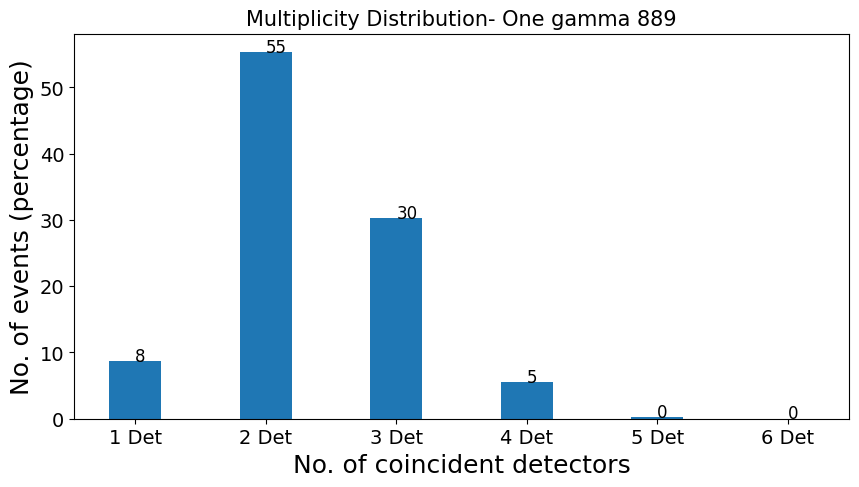

In [378]:
count = multipliciy_889

total = count.sum()
count=count/count.sum()*100
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(900)))   #Change time here
addlabels(courses, values)
# plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution- One gamma 889", fontsize="15")
plt.savefig("%s/Multiplicity_889.jpg"%(save_folder_each))

In [379]:
sl=[]
VetoCh_set = set(VetoCh)
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    vetoMatch = VetoCh_set.intersection(event_Channel)
    if not vetoMatch:
        if any(min_val_1132 <= element <= max_val_1132 for element in event_Energies):
            sl.extend([k])


energy_exclusive = []
multipliciy_1132 = np.zeros(N_det_CsI)
for k in range(len(sl)):
    j = Timed_Energy_event[sl[k]]
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    count_select = 0
    for element in event_Energies:
        if min_val_1132 <= element <= max_val_1132:
            energy_select = element
            count_select+=1
    energy_rest = sum(event_Energies) - energy_select
    energy_exclusive.extend([energy_rest])
    multipliciy_1132[len(j)]+=1

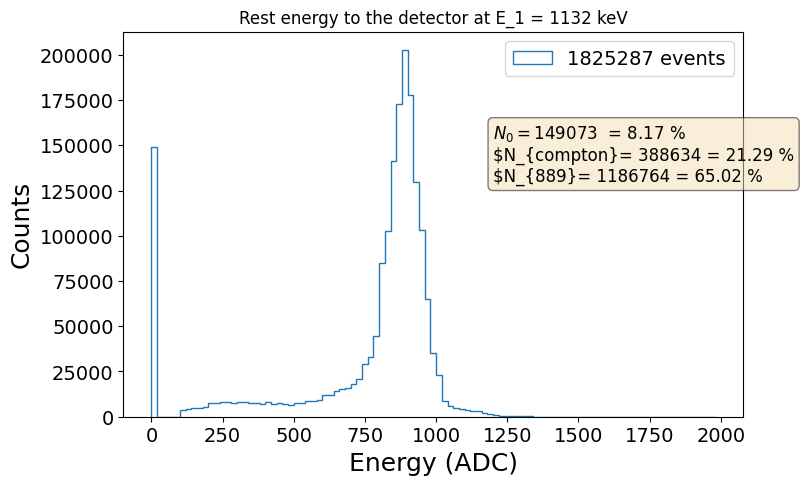

In [380]:
n,bins, patches=plt.hist(energy_exclusive, bins=np.arange(0,2000, 20), histtype="step", label="%d events"%len(energy_exclusive))
label("Energy (ADC)", "Counts", 10,5)

count_1132= np.zeros(3)
for j in energy_exclusive:
    if j == 0:
        count_1132[0]+=1
    elif j<min_val:
        count_1132[1]+=1
    elif min_val<j<max_val:
        count_1132[2]+=1

plt.legend(fontsize=14)
textstr = '\n'.join((
            r'$N_0= %d$  = %.2f %%' % (count_1132[0], count_1132[0]/len(energy_exclusive)*100),
            r'$N_{compton}= %d = %.2f %%' % (count_1132[1], count_1132[1]/len(energy_exclusive)*100),
            r'$N_{889}= %d = %.2f %%' % (count_1132[2], count_1132[2]/len(energy_exclusive)*100)
            ))               #"r'$\chi^2/Dof=%.2f$' % (b, )"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1200, max(n)*0.8, textstr, fontsize=12,
         verticalalignment='top', bbox=props)
plt.title("Rest energy to the detector at E_1 = 1132 keV", fontsize = 12)
plt.savefig("%s/EnergyRest_1132.jpg"%(save_folder_each))

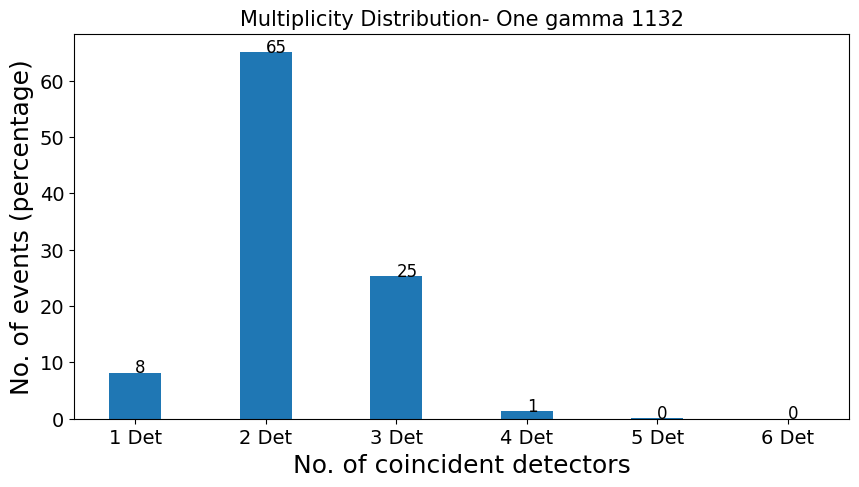

In [381]:
count = multipliciy_1132

total = count.sum()
count=count/count.sum()*100
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(900)))   #Change time here
addlabels(courses, values)
# plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution- One gamma 1132", fontsize="15")
plt.savefig("%s/Multiplicity_1132.jpg"%(save_folder_each))

In [382]:
# sl=[]
# VetoCh_set = set(VetoCh)
multipliciy_889only = np.zeros(N_det_CsI)
multipliciy_1132only = np.zeros(N_det_CsI)
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    vetoMatch = VetoCh_set.intersection(event_Channel)
    if not vetoMatch:
        if min_val < sum(event_Energies) < max_val:
            multipliciy_889only[len(j)]+=1
        elif min_val_1132 < sum(event_Energies) < max_val_1132:
            multipliciy_1132only[len(j)]+=1

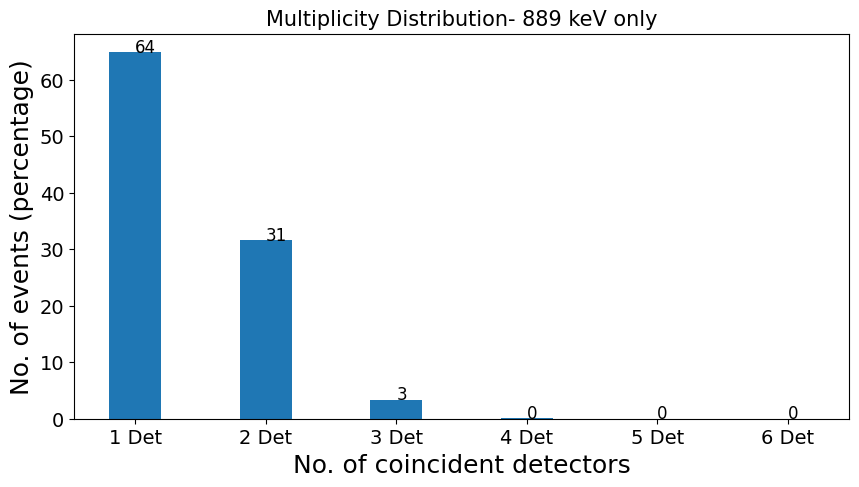

In [383]:
count = multipliciy_889only

total = count.sum()
count=count/count.sum()*100
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(900)))   #Change time here
addlabels(courses, values)
# plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution- 889 keV only", fontsize="15")
plt.savefig("%s/Multiplicity_889only.jpg"%(save_folder_each))

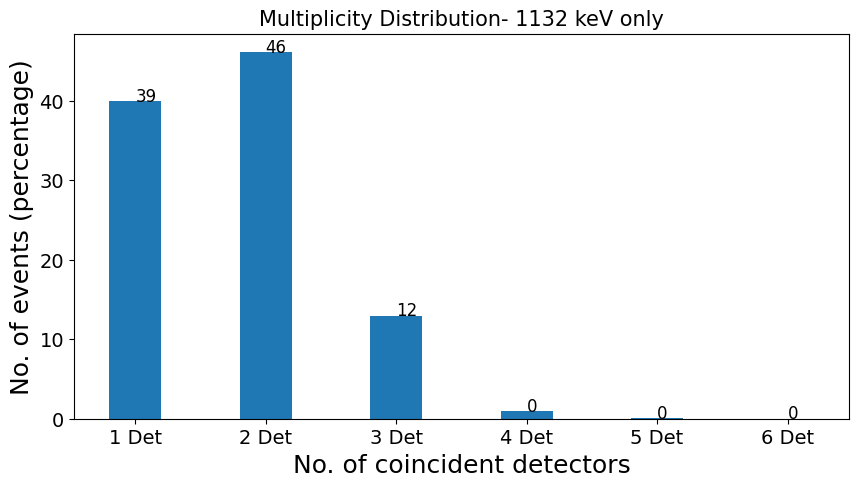

In [384]:
count = multipliciy_1132only

total = count.sum()
count=count/count.sum()*100
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(900)))   #Change time here
addlabels(courses, values)
# plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution- 1132 keV only", fontsize="15")
plt.savefig("%s/Multiplicity_1132only.jpg"%(save_folder_each))

In [2]:
Timed_Energy_event

NameError: name 'Timed_Energy_event' is not defined

In [22]:
 EventEnergyAll = []
EventEnergyInner = []
EventEnergyAll_NVeto = []
antiveto_index = []
EventEnergyInner_NVeto = []
Multiplicity_count = []
Multiplicity = np.zeros(len(csiCh))
Multiplicity_raw = np.zeros(len(csiCh))

Multiplicity_889 = np.zeros(len(csiCh))
Multiplicity_1132= np.zeros(len(csiCh))

csiCh_set = set(csiCh)
innerCh_set = set(innerCh)
VetoCh_set = set(VetoCh)

for k, j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    
    vetoMatch = VetoCh_set.intersection(event_Channel)
    non_veto_indices = np.isin(event_Channel, list(VetoCh), invert=True)
    multiplicity = np.sum(non_veto_indices)
    Multiplicity_raw[multiplicity - 1] += 1


    # In the loop
    event_in_csiCh = np.array([ch in csiCh_set for ch in event_Channel])
    event_in_innerCh = np.array([ch in innerCh_set for ch in event_Channel])

    
    EventEnergyall = np.sum(event_Energies[event_in_csiCh])
    EventEnergyinn = np.sum(event_Energies[event_in_innerCh])
    
    EventEnergyall_NVeto = 0
    EventEnergyinn_NVeto = 0
    
    if not vetoMatch:
        antiveto_index.append(k)
        multiplicity = len(j)
        Multiplicity[multiplicity - 1] += 1
        EventEnergyall_NVeto = np.sum(event_Energies[event_in_csiCh])
        EventEnergyinn_NVeto = np.sum(event_Energies[event_in_innerCh])

    
    EventEnergyAll.append(EventEnergyall)
    EventEnergyInner.append(EventEnergyinn)
    EventEnergyAll_NVeto.append(EventEnergyall_NVeto)
    EventEnergyInner_NVeto.append(EventEnergyinn_NVeto)
    
    if k % 1000000 == 0:
        print(f"{k // 1000000} M events done")
        # time.sleep(5)
 

# print(EventEnergyall, EventEnergyInner)
EventEnergyAll = np.array(EventEnergyAll)
EventEnergyInner = np.array(EventEnergyInner)
EventEnergyAll_NVeto = np.array(EventEnergyAll_NVeto)
EventEnergyInner_NVeto = np.array(EventEnergyInner_NVeto)

EventEnergyAll = EventEnergyAll[EventEnergyAll!=0]
EventEnergyInner = EventEnergyInner[EventEnergyInner!=0]
EventEnergyAll_NVeto = EventEnergyAll_NVeto[EventEnergyAll_NVeto!=0]
EventEnergyInner_NVeto = EventEnergyInner_NVeto[EventEnergyInner_NVeto!=0]


0 M events done
1 M events done
2 M events done
3 M events done
4 M events done
5 M events done
6 M events done
7 M events done
8 M events done
9 M events done


KeyboardInterrupt: 

In [28]:
count1 = np.zeros(2)
count_all = 0
for k,j in enumerate(Timed_Energy_event):
    # if 1988-3*96<EventEnergyAll[j]<1988+3*96:
    if 877-2*72<EventEnergyAll[k]<877+2*72:
        if len(j) == 1 or 2 or 3:
            count1[0]+=1
    elif 1108-2*94<EventEnergyAll[k]<1108+2*94:
        if len(j) == 1 or 2 or 3:
            count1[1]+=1
    elif 1988-2*96<EventEnergyAll[k]<1988+2*96:
        count_all+=1


In [29]:
count1, count_all

(array([1758563., 1874439.]), 9164044)

In [30]:
2.62/11.78

0.22241086587436334

In [23]:
len(Timed_Energy_event)

17482913

In [49]:
save_folder = '../RUN5/Sc46/Figures/Take4'

In [50]:
f = open('%s/DataInfo_Run.pickle'%save_folder, 'wb')
Parameter={'mean':mean}
pickle.dump(Parameter, f)
f.close()

In [28]:
mean

array([[ 85., 107.],
       [179., 225.],
       [ 79.,  99.],
       [ 55.,  69.],
       [105., 135.],
       [111., 139.],
       [ 87., 111.],
       [215., 273.],
       [ 87., 111.],
       [153., 195.],
       [ 59.,  73.],
       [153., 193.],
       [153., 193.],
       [323., 405.],
       [ 65.,  81.],
       [ 87., 107.],
       [121., 153.],
       [ 83., 103.],
       [ 83., 105.],
       [117., 145.],
       [ 87., 109.],
       [ 95., 119.],
       [105., 133.],
       [119., 151.],
       [199., 251.],
       [ 89., 111.]])

In [84]:
window1 = np.zeros((26, 2))
window2 = np.zeros((26, 2))
for k in range(26):
    window1[k, 0]= (mean[k,0] - gaus_x[0][k])/mean[k,0]
    window1[k, 1] = (gaus_x[1][k] - mean[k,0])/mean[k,0]
    window2[k, 0]= (mean[k,1] - gaus_y[0][k])/mean[k,0]
    window2[k, 1]= (gaus_y[1][k] - mean[k,1])/mean[k,0]

In [85]:
window1

array([[0.11601856, 0.14328266],
       [0.09717978, 0.12852528],
       [0.14318303, 0.15922296],
       [0.12614895, 0.15273969],
       [0.09669426, 0.18856018],
       [0.09316884, 0.11750911],
       [0.11710212, 0.12814729],
       [0.07676056, 0.11262189],
       [0.12262098, 0.17697185],
       [0.09976654, 0.12529183],
       [0.10888242, 0.16530761],
       [0.08254559, 0.10727256],
       [0.06768299, 0.11212101],
       [0.06012338, 0.11301179],
       [0.11064512, 0.14538128],
       [0.12997257, 0.17709593],
       [0.10223326, 0.10996616],
       [0.10577022, 0.10327051],
       [0.13973106, 0.13507707],
       [0.11046269, 0.10772571],
       [0.10014108, 0.12482364],
       [0.10645299, 0.09211301],
       [0.12184041, 0.09769949],
       [0.11343265, 0.09934351],
       [0.09647539, 0.1032511 ],
       [0.13371319, 0.09087968]])

In [189]:
save_folder = '../RUN5/Sc46/Figures/Take4'

In [190]:
f = open('%s/DataInfo_Run.pickle'%save_folder, 'rb')
dat = pickle.load(f)
mean=dat['mean']
f.close()
mean

array([[ 83. , 107. ],
       [173. , 221. ],
       [ 77. ,  97. ],
       [ 51. ,  65. ],
       [101. , 131. ],
       [105. , 133. ],
       [ 85. , 107. ],
       [205. , 261. ],
       [ 79. , 101. ],
       [135. , 173. ],
       [ 57. ,  73. ],
       [143. , 183. ],
       [143. , 185. ],
       [ 49. ,  85. ],
       [ 59. ,  75. ],
       [ 25.5,  25.5],
       [121. , 153. ],
       [ 83. , 105. ],
       [ 81. , 103. ],
       [111. , 141. ],
       [ 85. , 109. ],
       [ 93. , 117. ],
       [105. , 133. ],
       [119. , 149. ],
       [195. , 247. ],
       [ 87. , 109. ]])

In [33]:
save_folder

'../RUN5/Sc46/Figures/Take4'

In [8]:
import numpy as np

In [9]:
mean = np.array([[ 84.8721336 , 108.92616295],
       [177.15112634, 195.40908144],
       [ 79.00708724,  99.52093752],
       [ 53.88467917,  69.0449359 ],
       [105.77754898, 116.80673978],
       [108.82856609, 128.74095149],
       [ 81.81002175, 102.90557682],
       [212.26420676, 261.17853186],
       [ 95.03086391, 119.57410583],
       [148.95656733, 188.01965992],
       [ 57.59367614,  73.32353091],
       [158.31915837, 199.14571943],
       [149.73433891, 194.40279109],
       [205.52765191, 248.628607  ],
       [ 74.54545938,  92.72403452],
       [ 78.81103673,  99.86519874],
       [121.63481534, 152.58702336],
       [ 85.40969362, 106.76241753],
       [ 83.36414318, 104.43010667],
       [118.48591896, 147.82569991],
       [ 87.89730015, 100.24627662],
       [100.81246531, 109.11747466],
       [104.15794316, 130.730537  ],
       [140.92328711, 177.00116748],
       [210.90958318, 263.03674998],
       [ 93.21921929, 116.68396714]])

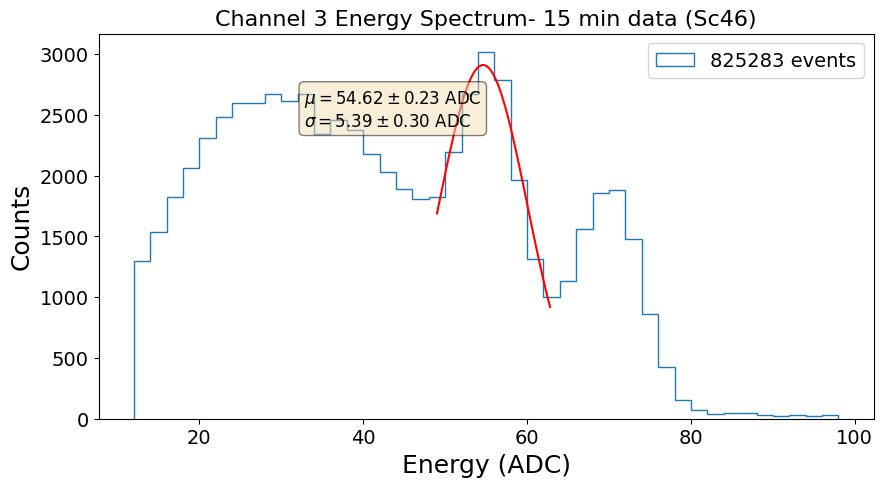

In [53]:
for k in range(3, 4):
    bin_last=mean[k, 0]*1.8
    bin_w=2
    nevent = len(energyPlot[k])
    n,bins, patches=plt.hist(energyPlot[k][0:int(nevent/ 10)], bins=np.arange(12,bin_last,bin_w), histtype="step", label="%d events"%len(energyPlot[k]))
    label("Energy (ADC)", "Counts", 10,5)
    plt.title(r"Channel %d Energy Spectrum- 15 min data (%s)"%(k, source), fontsize=16)

    peak1 = [mean[k, 0] - window1[k, 0]*mean[k, 0], mean[k, 0] + window1[k, 1]*mean[k, 0]]
    peak2 = [mean[k, 1] - window2[k, 0]*mean[k, 0], mean[k, 1] + window2[k, 1]*mean[k, 0]]
    try:
        a1, mean[k,0],sigma[k,0], fig = gaus_fit(peak1[0], peak1[1],bin_last/3,max(n)-max(n)/10)
        a2, mean[k,1],sigma[k,1], fig=gaus_fit(peak2[0], peak2[1],bin_last/1.5,max(n)-max(n)/2)
    except:
        pass
    plt.legend(fontsize=14)
    # plt.savefig("%s/Energy_Ch%d_new.jpg"%(save_folder_each,k))
    # plt.close()
    # print("%d done"%k)

In [31]:
from scipy.signal import find_peaks, savgol_filter

In [30]:
mean[k, 1] - mean[k,0]

43.10095509300095

Top two well-distinguished peaks found at x-values: [332. 104.], y-values: [ 11.5   731.375]
Mean of x-values of peaks: 218.0
Mean of y-values of peaks: 371.4375


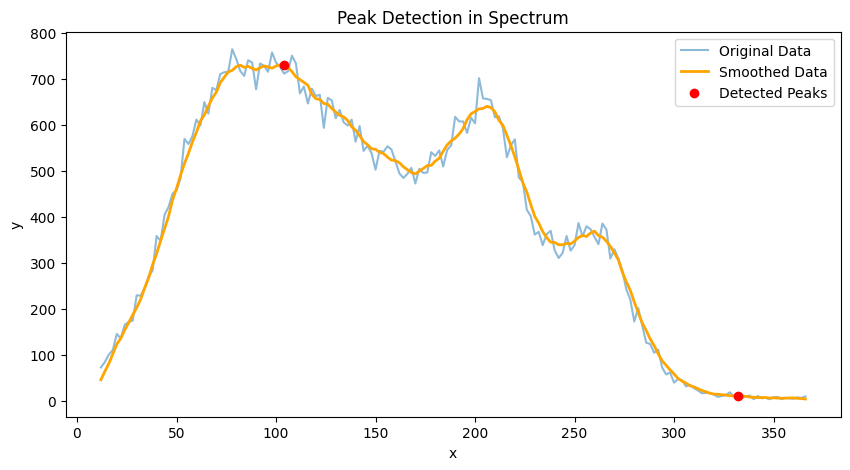

In [27]:


x = bins[:-1]
y = n

start_index = int(0.4 * len(x))

x_subset = x[start_index:]
y_subset = y[start_index:]

window_size = 8  # Example window size for smoothing
y_smooth = np.convolve(y_subset, np.ones(window_size)/window_size, mode='same')

# Find peaks in the smoothed data
peaks, _ = find_peaks(y_smooth, distance=30, height=0)  # Adjust distance to ensure separation

# If we have more than 2 peaks, we might want to sort them based on height or other criteria
# Find the two highest peaks
top_peaks_idx = np.argsort(y_smooth[peaks])[-2:]  # Sort by the y-values of the peaks
top_peaks = peaks[top_peaks_idx]  # Get the x-indices of the top two peaks

# Get the x-values and y-values of the two highest peaks
x_peaks = x_subset[top_peaks]
y_peaks = y_smooth[top_peaks]

# Calculate the mean of the peaks' x-values and y-values
mean_x = np.mean(x_peaks)
mean_y = np.mean(y_peaks)

# Print the results
print(f"Top two well-distinguished peaks found at x-values: {x_peaks}, y-values: {y_peaks}")
print(f"Mean of x-values of peaks: {mean_x}")
print(f"Mean of y-values of peaks: {mean_y}")

# Plot the data with the peaks marked
plt.plot(x, y, label='Original Data', alpha=0.5)
plt.plot(x, y_smooth, label='Smoothed Data', color='orange', linewidth=2)
plt.scatter(x_peaks, y_peaks, color='red', label='Detected Peaks', zorder=5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Peak Detection in Spectrum')
plt.show()


In [40]:
np.sort(x_peaks)

array([204., 256.])

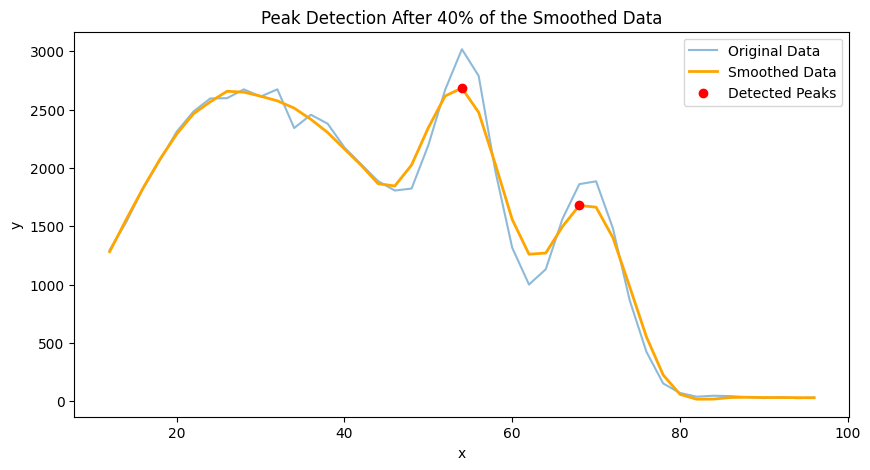

Detected top two prominent peaks at x-values: [68. 54.]


In [55]:
x = bins[:-1]
y = n

# Apply smoothing to the entire dataset using Savitzky-Golay filter
# Use a relatively large window size to smooth out small fluctuations but preserve peaks
y_smooth = savgol_filter(y, window_length=9, polyorder=3)

# Find the index where 40% of the data lies
start_index = int(0.4 * len(x))

# Subset the smoothed data to include only values after 40%
x_subset = x[start_index:]
y_subset_smooth = y_smooth[start_index:]

# Find peaks in the smoothed subset of data (after 40%)
# We will use the prominence criterion to select well-separated peaks
min_prominence = 0.2  # Minimum prominence to filter out small fluctuations (adjust this)
min_distance = 3  # Minimum number of data points between peaks to ensure they are well-separated

peaks, properties = find_peaks(y_subset_smooth, prominence=min_prominence, distance=min_distance)

# Ensure we only pick the two most prominent peaks
peak_prominences = properties['prominences']
top_peaks_idx = np.argsort(peak_prominences)[-2:]  # Get indices of the two highest peaks

# Get the x and y values of the top two highest peaks
top_peaks = peaks[top_peaks_idx]
x_peaks = x[start_index:][top_peaks]  # Adjust the peak indices to the original x-values
y_peaks = y_smooth[start_index:][top_peaks]  # Adjust the peak indices to the smoothed y-values


# Plot the original and smoothed data, and mark the detected peaks
plt.plot(x, y, label='Original Data', alpha=0.5)
plt.plot(x, y_smooth, label='Smoothed Data', color='orange', linewidth=2)
plt.scatter(x_peaks, y_peaks, color='red', label='Detected Peaks', zorder=5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Peak Detection After 40% of the Smoothed Data')
plt.show()

# Print the x and y values of the detected peaks
print(f"Detected top two prominent peaks at x-values: {x_peaks}")


In [70]:
window1 = np.array([0.08421171, 0.14235891])
window2 = np.array([0.09417717, 0.19114053])

In [ ]:
column_names = ["X", "Y", "amp1", "mean1", "sigma1", "amp2", "mean2", "sigma2"]

df = pd.DataFrame(Energy_feature, columns=column_names)

In [ ]:
Energy_feature = np.array(Energy_feature, dtype = object)

In [ ]:
import pandas as pd

In [ ]:
df = pd.dataframe()

In [89]:
bin_last = np.array([150, 300, 150, 100, 200,      
                     200, 150, 400, 160, 300,       
                     100, 250, 250, 350, 130, 
                     150, 200, 150, 150, 250,      
                     170, 170, 200, 250, 300, 160])

In [3]:
Mean = np.array([[87, 110],[180, 230], [80, 100], [55, 70], [105, 140],
                 [110, 140], [80, 105], [210, 270], [98, 121], [150, 190],
                 [58, 73], [158, 200], [150, 195], [200, 275], [75, 92],
                 [80, 102], [122, 153], [87, 107], [85, 110], [115, 155],
                 [89, 110], [103, 130], [105, 135], [145, 180], [205, 270], [95, 118]])

In [ ]:
125

In [4]:
Range1 = np.array([[ 75, 160,  68,  44,  87,        96,  70, 187, 80, 125,        50, 142, 133, 180,  66,  
                     66, 110,  75,  69, 102,         76, 84,  92, 118, 170, 77],
                    [97, 200,  92,  58,  115,        122,  92, 225, 100, 155,       65, 168, 167, 225,  85,  
                     82, 130,  95,  91, 135,         97, 110,  115, 155, 222, 102]])

Range2 = np.array([[100, 210,  92,  58, 118,         125,  94, 235, 105, 160,        65, 180, 175, 230,  85,  
                    85, 140,  96,  91, 140,          98, 112, 120, 155, 230, 102],
                   [125, 250, 120,  75, 150,         150, 120, 280, 125, 195,        80, 220, 210, 300, 115, 
                    105, 180, 120, 115, 170,         125, 140, 145, 195, 280, 130]])

In [39]:
M = np.array(mean, dtype = int)

In [ ]:
Range = np.array([[80, 125], [160, 250], [70, 120], [48, 80], [95, 150],
                   [100, 150], [74, 120], [195, 300], [88, 140], [135, 210],
                  [52, 84], [145, 220], [140, 220], [185, 280], [65, 110],
                  [70, 115], [110, 170], [75, 120], [70, 120], [100, 170],
                  [75, 125], [85, 140], [95, 150], [120, 200], [190, 290], [80, 135]])

In [17]:
import pickle

In [20]:
f = open('%s/DataInfo_Run.pickle'%(save_folder), 'wb')
Parameter={'mean':mean}
pickle.dump(Parameter, f)
f.close()

In [18]:
f = open('%s/Folder_21/Calibration_parameter_folder21_index0.pickle'%save_folder, 'rb')
dat = pickle.load(f)
mean = dat['Mean']

In [16]:
save_folder="../RUN5/Sc46/Figures/Take2" 

In [ ]:
save_folder="../RUN5/Sc46/Figures/Take3"  
f = open('%s/DataInfo_Run.pickle'%save_folder, 'rb')
dat = pickle.load(f)
mean=dat['mean']
bin_last = dat['bin_last']
good_range1 = dat["best_range1"]
good_range2 = dat["best_range2"]
f.close()

In [ ]:
k = 2

window1 = [mean[k, 0] - good_range1[0, k],  good_range1[1, k]- mean[k, 0]]
window2 = [mean[k, 1] - good_range2[0, k], good_range2[1, k] - mean[k, 1]]
print(window1, window2)

window1 = [Mean[k, 0] - Range1[0, k],  Range1[1, k]- Mean[k, 0]]
window2 = [Mean[k, 1] - Range2[0, k], Range2[1, k] - Mean[k, 1]]
print(window1, window2)

In [ ]:
for k in range(26):
    window1 = [mean[k, 0] - good_range1[0, k],  good_range1[1, k]- mean[k, 0]]
    window2 = [mean[k, 1] - good_range2[0, k], good_range2[1, k] - mean[k, 1]]
    print(k, window1, window2)

In [ ]:
np.shape(Mean), np.shape(Range.T)

In [ ]:
f = open('%s/DataInfo_Run.pickle'%save_folder, 'rb')
dat = pickle.load(f)
mean=dat['mean']
bin_last = dat['bin_last']
good_range = dat["best_range"]
amp = dat["amp"]
f.close()

In [ ]:
np.shape(mean), np.shape(good_range)

In [ ]:
window1 = mean[k, 0] - good_range[0, k]
window2 = good_range[1, k] - mean[k, 1]
peak_position_1st = mean[k, 0] +window1/2
peak_distance = mean[k, 1] - mean[k, 0]
check_ratio = 0.25  #maximum sigma/mu ratio can be 20 %, in the worst case
check_minfit = bin_last[k]*0.3  # 1st peak should start at least 30% of the total bins
shift_width = (1 if mean[k, 0]<50 else 2 if 50<mean[k, 0]<80 else 3 if 80<mean[k, 0]<100 else 4)

In [ ]:
np.shape(mean)

In [ ]:
np.shape(Mean)

In [ ]:
np.array([gaus_x[0], gaus_y[1]])

In [ ]:
best_range = np.array([gaus_x[0], gaus_y[1]])

In [ ]:
def Best_range_two_peaks(self, window1, window2, check_ratio, check_minfit, peak_distance):
    """
    Find the best range for dual-Gaussian fit by calculating the minimum error over different ranges.
    
    Parameters:
        window1: Width of the range on the left of the first peak.
        window2: Width of the range on the right of the second peak.
        check_ratio: Threshold for sigma/mu ratio to filter poor fits.
        check_minfit: Minimum mean value to consider the fit valid.
        peak_distance: Estimated distance between the two peaks.
        
    Returns:
        best_range: Tuple containing the start and end points of the best range found.
        Params: Contains the fit parameters of the best dual-Gaussian fit.
    """

    sigm_mu = 0.07  # Typical PMT sigma/mu ratio.
    sigma_initial = self.peak_position_1st * sigm_mu
    best_residual = float('inf')
    Params = []
    best_range = (self.peak_position_1st - window1, self.peak_position_1st + 2 * window2)  # Default initial range
    
    for shift_index in range(self.max_rightshift, self.max_shift):
        # Adjust range to include both peaks
        peak_position_1 = self.peak_position_1st - self.shift_width * shift_index
        peak_position_2 = peak_position_1 + peak_distance
        start = max(0, peak_position_1 - window1)
        end = min(max(self.x) - 1, peak_position_2 + window2)

        # Ensure the range is valid
        if start >= end:
            continue  # Skip invalid ranges

        closest_index_start = np.abs(self.x - start).argmin()
        closest_index_end = np.abs(self.x - end).argmin()

        x_window = self.x[closest_index_start:closest_index_end]
        y_window = self.y[closest_index_start:closest_index_end]

        # Ensure there are enough data points for fitting
        if len(y_window) < 6:  # At least 6 points for fitting 6 parameters (2 Gaussians)
            continue

        # Initial guess for dual-Gaussian fit
        try:
            initial_guess = [
                max(y_window), peak_position_1, sigma_initial,  # Peak 1
                max(y_window) * 0.8, peak_position_2, sigma_initial  # Peak 2
            ]

            # Define dual-Gaussian function
            def dual_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
                return (
                    A1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2) +
                    A2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2)
                )

            # Fit and calculate residuals
            params, _ = curve_fit(dual_gaussian, x_window, y_window, p0=initial_guess)
            residuals = y_window - dual_gaussian(x_window, *params)
            residual_sum = np.sum(residuals**2)

            # Validate and update best fit
            sigma1_ratio = params[2] / params[1]
            sigma2_ratio = params[5] / params[4]
            if (
                residual_sum < best_residual and
                sigma1_ratio < check_ratio and sigma2_ratio < check_ratio and
                params[1] > check_minfit and params[4] > check_minfit
            ):
                best_residual = residual_sum
                best_range = [closest_index_start, closest_index_end]
                Params = params

        except (ValueError, RuntimeError):
            continue  # Skip if fitting fails for this range

    self.best_range = best_range
    self.Params = Params
    return best_range, Params

In [ ]:
f = open('%s/DataInfo_Run.pickle'%(save_folder), 'wb')
Parameter={'Date': '103024', 'Time': 300, 'bin_last':bin_last, 'bin_width':bin_w, 'best_range':best_range, 'mean':mean, 'sigma':sigma}
pickle.dump(Parameter, f)
f.close()

In [ ]:
save_folder_each = '../RUN5/Sc46/Figures/Take2\\Folder_10'

In [ ]:
best_range

# Background

In [5]:
N_det=26+11
Det_Comb=21

energyThreshold = 100
timeWindow=5e-7
Date="103024"
         #Not required if you are doing the full run. 
#first cut_data event or 2nd, Ex: index=0 means collecting first 60 second of data and 
                                 #index=1 means collecting second 60 second of data and so on...     
# run_index=0      #int(sys.argv[1])    #Type the index of run mentioned in the data file, required while taking multiple dataset 

                        #glob.glob("../RUN4/Sc46/DAQ/*")
folder_index = 1   #int(sys.argv[1])
read_folder = "../RUN5/Background/DAQ/CsI_NoSource_Take4_%d//"%folder_index
index=0
run_index = 5


save_folder_each = '../RUN5/Background/Figures/Take4/'
cut_data=3600               #Select the required second of data
innerChannel=np.arange(16,26)
date="%s"%(Date)
serial=np.array(["1st","2nd","3rd","4th","5th","6th", "7th", "8th"])
save_folder_each = os.path.join(save_folder, "Folder_%d"%folder_index)


In [6]:
files = glob.glob('%s/RAW/*.CSV'%read_folder)
files=natsorted(files)
# files = files
# print(files)
MinTime=np.zeros(N_det)
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if line_count == 0:
            MinTime[nf] = float(row[2]) * 1e-12
            break
minTime=np.min(MinTime)


# In[5]:

data=[]
for j in range(3):                                     #3=channel, time, calib. energy
    b=[]
    data.append(b)
nEvent=np.zeros(len(files))
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if float(row[2])*1e-12 - minTime>=cut_data*index:
            data[0].append(int(row[1]))
            data[1].append(float(row[2])*1e-12 - minTime)
            data[2].append(float(row[3]))     # row[4] = Caliberated energy, row[3] = ADC energy sometime, else row[3] = Caliberated energy
            line_count += 1
            # if line_count%1000000==0:
            #     print("%d M data loaded"%int(line_count/1000000))
            if float(row[2])*1e-12 - minTime>cut_data*(index+1):
                data[0].pop()
                data[1].pop()
                data[2].pop()
                break
    nEvent[nf]=line_count-1
    print("file %d done"%nf)
nEvents=int(nEvent.sum())


Data_Time=round((data[1][nEvents-1]-data[1][0]),0)
print("Total Time for this data set is %d s"%Data_Time)

file 0 done
file 1 done
file 2 done
file 3 done
file 4 done
file 5 done
file 6 done
file 7 done
file 8 done
file 9 done
file 10 done
file 11 done
file 12 done
file 13 done
file 14 done
file 15 done
file 16 done
file 17 done
file 18 done
file 19 done
file 20 done
file 21 done
file 22 done
file 23 done
file 24 done
file 25 done
file 26 done
file 27 done
file 28 done
file 29 done
file 30 done
file 31 done
file 32 done
file 33 done
file 34 done
file 35 done
file 36 done
Total Time for this data set is 3599 s


In [7]:
data=np.array(data).T
data=data[data[:, 1].argsort()]
data=np.array(data).T

In [8]:
nEvents = len(data[0])
energyPlot=[[] for _ in range(26)]
for i in range(nEvents):
    if data[0][i] < 26:
        energyPlot[int(data[0][i])].extend([data[2][i]])

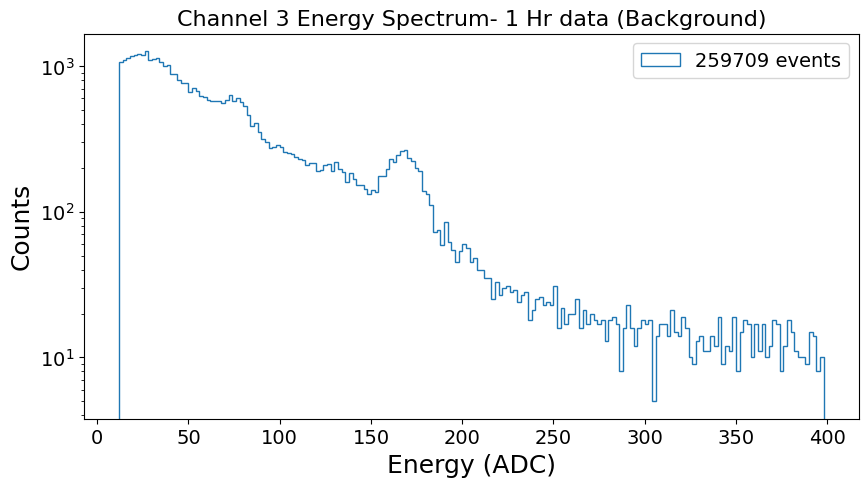

In [81]:
bin_last = np.array([450, 300, 350, 400, 200,       200, 150, 400, 200, 300,       100, 250, 250, 500, 160, 
                     150, 200, 150, 150, 250,       200, 170, 200, 250, 300, 200])
# for k in range(16, 17):
k=3
bin_w=np.array([2,2,2,2,2,    2,2,2,2,2,    2,2,2,2,2,   2,2,2,2,2,  2,2,2,2,2,  2])
# n1,bins1,patches=plt.hist(SmEnergy[k], bins=np.arange(10,bin_last[k],bin_w[k])*13, histtype="step", label="%d events"%len(SmEnergy[k]))
nevent = len(energyPlot[k])
n,bins, patches=plt.hist(energyPlot[k][0:int(nevent)], bins=np.arange(12,bin_last[k],bin_w[k]), histtype="step", label="%d events"%len(energyPlot[k]))
label("Energy (ADC)", "Counts", 10,5)
plt.yscale("log")
# no[k]=n
plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Background)"%k, fontsize=16)

# gaus_x=np.array([[120, 110, 240,  30, 60,         65, 50, 135, 70, 90,             33, 105, None, None, 40,           98, 73, 52, 45, 70,             55, 55, 63,  85, 100, None],
#                 [160, 150, 315, 45, 80,            90, 70, 190, 100, 130,           50, 140, 175, 350, 60,          125, 100, 75, 65, 100,           75, 85, 90, 125, 160, 65]])/mean[k, 1]*1460

# gaus_y=np.array([[ 160,  260,  100,  70, 130,       165,  120,  320, 155,  205,       80, 250,  180,  290,  93,      110,  170,  115,  105, 177,       125,  140, 155,  195,  255,  205]
#         ,        [ 160,  300, 135,  90,  160,       185,  145,  360,  180,  245,     95, 290,  220,  360,  110,     130,  200,  160,  125,  210,        150,  165, 185,  240, 310,  250]])/mean[k, 1]*1460

# try:
#     a1, mean[k,0],sigma[k,0], fig = gaus_fit(gaus_x[0][k],gaus_x[1][k],bin_last[k]/3,max(n)-max(n)/10)
# except:
#     pass

plt.legend(fontsize=14)
# plt.savefig("%s/Energy_Ch%d_1.jpg"%(save_folder,k))
# plt.close()
# print("%d done"%k)

In [96]:
mean = np.zeros(26)

Peak found at x = 410.0, y = 102.62774725274616


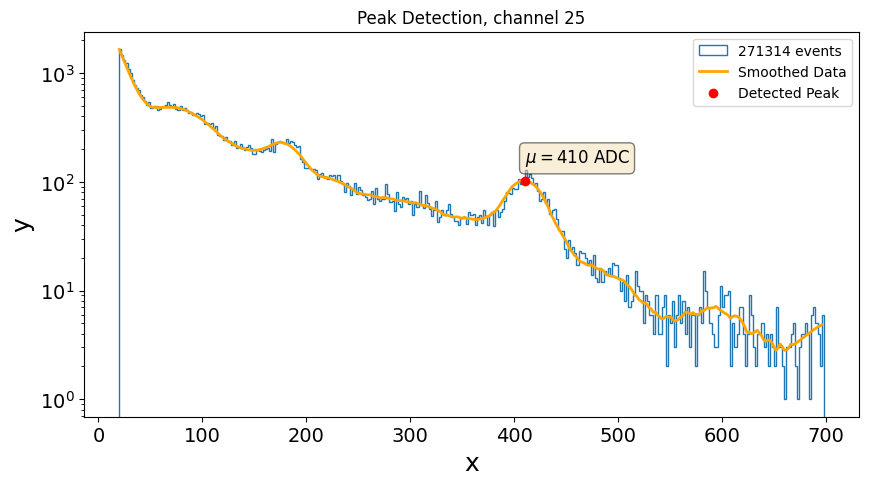

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


k=25

bin_last = np.array([250, 300, 350, 400, 250,       500, 450, 900, 300, 600,       300, 650, 650, 200, 560, 
                     250, 400, 350, 300, 600,       400, 200, 400, 250, 500, 700])
n,bins, patches=plt.hist(energyPlot[k], bins=np.arange(20,bin_last[k],2), histtype="step", label="%d events"%len(energyPlot[k]))
label("Energy (ADC)", "Counts", 10,5)
plt.yscale("log")
plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Background)"%k, fontsize=16)


# Assuming 'bins' and 'n' are your original data
x = bins[:-1]
y = n

# Apply smoothing to the data using Savitzky-Golay filter (or you can use moving average as well)
window_size = int(bin_last[k]/25)  # Window size for smoothing, should be odd
y_smooth = savgol_filter(y, window_size, polyorder=3)

# Find the minimum value of the spectrum
min_value = np.min(x)
max_value = np.max(x)

# Define the threshold as 20% of the minimum value
threshold = 0.4 * max_value + min_value 

# Create a mask to select the data points where y is greater than 20% of the minimum value
mask = x >= threshold

# Subset the data starting from the point where the values are above the threshold
x_subset = x[mask]
y_subset = y_smooth[mask]

# Find peaks in the subset of the data
peaks, _ = find_peaks(y_subset, distance=10, height=0)  # Adjust distance to ensure separation

# If no peaks are found, you can handle it accordingly
if len(peaks) > 0:
    # Get the index of the single highest peak in the subset
    top_peak_idx = np.argmax(y_subset[peaks])
    peak_x = x_subset[peaks[top_peak_idx]]
    peak_y = y_subset[peaks[top_peak_idx]]
else:
    peak_x = None
    peak_y = None

# Print the results
print(f"Peak found at x = {peak_x}, y = {peak_y}")

textstr = r'$\mu=%d $ ADC' %(peak_x)                        #"r'$\chi^2/Dof=%.2f$' % (b, )"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(peak_x, peak_y*2, textstr, fontsize=12,
         
         verticalalignment='top', bbox=props)

# Plot the original data, smoothed data, and the detected peak
# plt.plot(x, y, label='Original Data', alpha=0.5)
plt.plot(x, y_smooth, label='Smoothed Data', color='orange', linewidth=2)
if peak_x is not None:
    plt.scatter(peak_x, peak_y, color='red', label='Detected Peak', zorder=5)
plt.legend()
plt.yscale("log")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Peak Detection, channel %d'%k)
# plt.show()
plt.savefig("%s/Energy_Ch%d.jpg"%(save_folder,k))
mean[k] = peak_x

In [9]:
mean = np.array([132, 188, 184, 166, 150, 234, 162, 442, 130, 246, 128, 363, 259, 
                83, 337, 115, 185, 199, 141, 261, 153, 87, 213, 109, 285, 410])

In [ ]:
mean = np.array([[  0.        , 137.76821703],
       [128.45984582, 277.89474403],
       [  0.        , 114.5681367 ],
       [ 34.76188092,  78.40979191],
       [ 69.36950264, 143.35363299],
       [ 76.27373579, 177.29695885],
       [ 58.13582178, 129.14594561],
       [156.04963477, 340.79684612],
       [ 78.22794966, 167.96767917],
       [102.57242281, 223.37352349],
       [ 39.60867119,  87.23166689],
       [118.57006764, 265.51474455],
       [  0.        , 200.91319385],
       [  0.        , 316.65507372],
       [ 45.99746529, 102.54695343],
       [  0.        , 121.22124497],
       [ 86.24227177, 185.88527156],
       [ 63.02719863, 137.63812034],
       [ 54.84603614, 115.23408134],
       [ 80.75373249, 191.64842964],
       [ 62.6316803 , 137.23954506],
       [ 70.86346398, 151.59958404],
       [ 76.26490547, 171.03389395],
       [ 98.16548741, 218.66008226],
       [116.62573093, 279.84278   ],
       [  0.        , 229.31680974]])

In [10]:
nEvents = len(data[0])
energy_source = 1460
for j in range(nEvents):
    if data[0][j]<26:
        data[2][j]=data[2][j]/mean[int(data[0][j])]*energy_source

In [14]:
from ASCID_analysis import *

In [ ]:
save_folder_each = "../RUN5/Background/Figures/Take3"

Data preprocessing done
data coincidence done
0 M events done
grouped energy done


TypeError: label() missing 1 required positional argument: 'b'

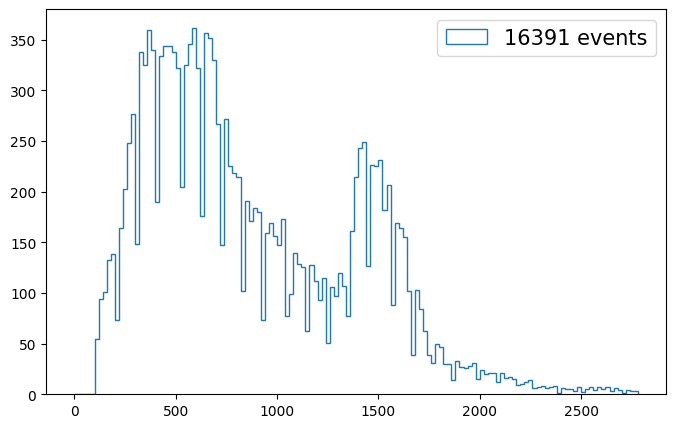

In [13]:
analysis = ASCID_analysis(data, 3600)
analysis.data_preprocess()
analysis.coincidence()
analysis.CoaddedEnergy()
analysis.added_energy("All", plot = plottype)
analysis.added_energy("inner", plot = plottype)
analysis.multiplicity(plot = plottype, veto = "Veto")
analysis.multiplicity(plot = plottype, veto = "noVeto")
analysis.coincidence_1det(plot = plottype)
analysis.coincidence_2det(plot = plottype)
analysis.save_pickle(energy = False)

In [36]:
save_folder_each = '../RUN5/Background/Figures/Take3'
run_index, folder_index, index = 5, 0, 0

In [39]:
f = open('%s/Output_Run%d-folder%d_index%d.pickle'%(save_folder_each,run_index, folder_index, index), 'rb')
dat = pickle.load(f)
n_EnergyAll_NVeto = dat['n_EnergyAll_NVeto']
Bins = dat['Bins']
f.close()

In [48]:
n_EnergyAll_NVeto.sum()

719195.0

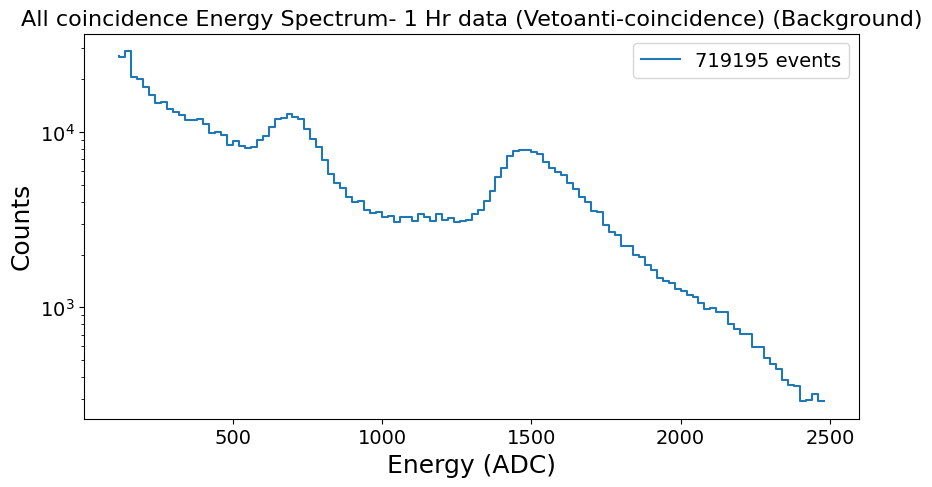

In [58]:
plt.step(Bins[1:], n_EnergyAll_NVeto, label="%d events"%n_EnergyAll_NVeto.sum())
label("Energy (ADC)", "Counts", 10,5)
plt.yscale("log")
plt.title(r"All coincidence Energy Spectrum- 1 Hr data (Vetoanti-coincidence) (Background)", fontsize=16)
plt.legend(fontsize = 14)
plt.savefig("%s/EnergyAll.jpg"%(save_folder_each))

In [59]:
877-1.2*77, 877+1.2*77, 1109-1.2*94, 1109+1.2*94

(784.6, 969.4, 996.2, 1221.8)

In [60]:
count_region1 = 0
count_region2 = 0
for k, j in enumerate(Bins[1:]):
    if 784.6<j<969.4:
        count_region1+= n_EnergyAll_NVeto[k]
    elif 996.2<j<1222:
        count_region2+= n_EnergyAll_NVeto[k]

In [61]:
count_region1, count_region2

(46693.0, 39178.0)

In [ ]:
Energy_antiveto = [[] for _ in range(52)]
Energy = [[] for _ in range(52)]
antiveto_index_set = set(antiveto_index)

for k, j in enumerate(Timed_Energy_event):
    channels = data[0, j].astype(int)  # Assuming `data[0]` can be indexed by `j`
    energies = data[2, j]  # Same assumption for `data[2]`
    for channel, energy in zip(channels, energies):
        Energy[channel].append(energy)
        if k in antiveto_index_set:
            Energy_antiveto[channel].append(energy)
    if k % 100000 == 0:
        print(f"done {int(k/100000)} 100K")


In [ ]:

for c in range(26):
    bin_w = 2/mean[c, 1]*1460
    Bins = np.arange(20, 2500, bin_w)
    plt.rcParams['figure.figsize'] = [12,5]
    n1,bins,patches=plt.hist(Energy[c], bins=Bins,label="%d events, all"%len(Energy[c]), histtype="step")
    n2,bins,patches=plt.hist(Energy_antiveto[c], bins=Bins,label="%d events, Veto antocoincidence"%len(Energy_antiveto[c]), histtype="step")
    plt.legend(loc="lower left", fontsize=15)
    # plt.xticks(np.arange(0, 4000, 250))
    plt.yscale("log")
    label("Energy (keV)", "Counts", 12, 5)
    plt.title("%d channel Spectrum "%c, fontsize=14)
    plt.grid()
    plt.savefig("%s/Energy-%dChannel_log.jpg"%(save_folder_each, c))
    plt.close()

In [ ]:
pair = np.array([16, 23])
a = np.array([23, 16])
if set(a) == set(pair):  # Check if `a` is the reverse of `pair`
    print("done")

# pair[::-1] 

In [ ]:
pair = np.array([1, 23])
C = np.array([23, 16])
pair[C.argsort()]

In [ ]:
Energy_2det=[]
Channel_2det=[]
Energy_2det_inner=[]
count=0
pair = [16, 23]
for l in Timed_Energy_event:
    if len(l)==2:
        C = np.array([data[0][l[0]], data[0][l[1]]])
        if set(C) == set(pair):
            E1=data[2][l[0]]
            E2=data[2][l[1]]
            E=np.array([E1, E2])
            E=E[C.argsort()]
            Energy_2det.extend([E])
            Channel_2det.extend([C])
Energy_2det=np.array(Energy_2det, dtype=object)
# Energy_2det_add=Energy_2det[:,0]+Energy_2det[:,1]



N=100
h=plt.hist2d(Energy_2det[:,0], Energy_2det[:,1], bins=(np.arange(0,2000,2000/N), np.arange(0,2000,2000/N)))
plt.colorbar()
# h=plt.hist2d(Energy_2det_sl[0], Energy_2det_sl[1], bins=(np.arange(0,2500,2500/N), np.arange(0,2500,2500/N)), norm = LogNorm())
plt.title("2 detector coincidence events distribution", fontsize=14)
label("Channel %d Energy (keV)"%pair[0], "Channel %d Energy (keV)"%pair[1], 8,5)
plt.savefig("%s/2Det-Pair_%d_%d.jpg"%(save_folder, pair[0], pair[1]))
# plt.close()

In [ ]:
nEvents = len(data[0])
energyPlot=[[] for _ in range(26)]
for i in range(nEvents):
    if data[0][i] < 26:
        energyPlot[int(data[0][i])].extend([data[2][i]])

In [ ]:
k=25
for k in range(16, 17):
    bin_last=np.array([500,500,300,150,300,   250,200,500,300,300,    150,350,500,700,200,    200,300,230,200,350,   200,250,300,350,500,  400])/mean[k, 1]*1460
    bin_w=np.array([2,2,2,2,2,    2,2,2,2,2,    2,2,2,2,2,   2,2,2,2,2,  2,2,2,2,2,  2])/mean[k, 1]*1460
    # n1,bins1,patches=plt.hist(SmEnergy[k], bins=np.arange(10,bin_last[k],bin_w[k])*13, histtype="step", label="%d events"%len(SmEnergy[k]))
    nevent = len(energyPlot[k])
    n,bins, patches=plt.hist(energyPlot[k][0:int(nevent)], bins=np.arange(12,bin_last[k],bin_w[k]), histtype="step", label="%d events"%len(energyPlot[k]))
    label("Energy (ADC)", "Counts", 10,5)
    plt.yscale("log")
    # no[k]=n
    plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Background)"%k, fontsize=16)
    
    # gaus_x=np.array([[None, 110, 240,  30, 60,         65, 50, 135, 70, 90,             33, 105, None, None, 40,           98, 73, 52, 45, 70,             55, 55, 63,  85, 100, None],
    #                 [160, 150, 315, 45, 80,            90, 70, 190, 100, 130,           50, 140, 175, 350, 60,          125, 100, 75, 65, 100,           75, 85, 90, 125, 160, 65]])/mean[k, 1]*1460
    
    gaus_y=np.array([[ 120,  260,  100,  70, 130,       165,  120,  320, 155,  205,       80, 250,  180,  290,  93,      110,  170,  115,  105, 177,       125,  140, 155,  195,  255,  205]
            ,        [ 160,  300, 135,  90,  160,       185,  145,  360,  180,  245,     95, 290,  220,  360,  110,     130,  200,  160,  125,  210,        150,  165, 185,  240, 310,  250]])/mean[k, 1]*1460
    
    # try:
    #     a1, mean[k,0],sigma[k,0], fig = gaus_fit(gaus_x[0][k],gaus_x[1][k],bin_last[k]/3,max(n)-max(n)/10)
    # except:
    #     pass
    
    try:
        gaus_fit(gaus_y[0][k],gaus_y[1][k],bin_last[k]/1.5,max(n)-max(n)/2,nm="keV")
        gaus_fit(1550 ,1750 ,1700, max(n)-max(n)/1.2,nm="keV")
        gaus_fit(600 ,800 ,170, max(n)-max(n)/1.2,nm="keV")
    except:
        pass
        
    plt.legend(fontsize=14)
    plt.savefig("%s/Energy_Ch%d_1.jpg"%(save_folder,k))
    # plt.close()
    # print("%d done"%k)

In [ ]:
save_folder = '../RUN5/Background/Figures/Take3/'

In [ ]:
f = open('../RUN5/Sc46/Figures/DataInfo_Run.pickle', 'rb')
dat = pickle.load(f)
mean1=dat['mean']
sigma1=dat['sigma']
bin_last1 = dat['bin_last']
gaus_x1 = dat["gaus_x"]
f.close()

In [ ]:
bin_last=np.array([500,500,300,150,300,   250,200,500,300,300,    150,350,500,700,200,    200,300,230,200,350,   200,250,300,350,500,  400])
bin_w=np.array([2,2,2,2,2,    2,2,2,2,2,    2,2,2,2,2,   2,2,2,2,2,  2,2,2,2,2,  2])
gaus_x=np.array([[None, 110, 240,  30, 60,         65, 50, 135, 70, 90,             33, 105, None, None, 40,           98, 73, 52, 45, 70,             55, 55, 63,  85, 100, None],
                    [160, 150, 315, 45, 80,            90, 70, 190, 100, 130,           50, 140, 175, 350, 60,          125, 100, 75, 65, 100,           75, 85, 90, 125, 160, 65]])
    
gaus_y=np.array([[ 120,  260,  100,  70, 130,       165,  120,  320, 155,  205,       80, 250,  180,  290,  93,      110,  170,  115,  105, 177,       125,  140, 155,  195,  255,  205]
            ,        [ 160,  300, 135,  90,  160,       185,  145,  360,  180,  245,     95, 290,  220,  360,  110,     130,  200,  160,  125,  210,        150,  165, 185,  240, 310,  250]])

In [ ]:
667/80*250

In [1]:
import pyautogui
import time


In [2]:
pyautogui.FAILSAFE = False

In [3]:

while True:
    pyautogui.moveRel(10, 0, duration=0.1)  # Move 10 pixels to the right
    time.sleep(60)                         # Wait for 60 seconds
    pyautogui.moveRel(-10, 0, duration=0.1)  # Move back 10 pixels to the left


KeyboardInterrupt: 

In [4]:
save_folder = '../RUN5/Background/Figures/Take3'

In [2]:
import os



In [3]:
import os
import glob

def get_folder_size(folder_path):
    """Calculate the total size of all files in a folder."""
    total_size = 0
    for dirpath, _, filenames in os.walk(folder_path):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            # Skip if the file is broken or inaccessible
            if os.path.exists(filepath):
                total_size += os.path.getsize(filepath)
    return total_size

def filter_folders_by_size(folder_list, size_threshold):
    """
    Filter folders by their total memory usage.

    Args:
        folder_list (list): List of folder paths.
        size_threshold (int): Minimum folder size in bytes.

    Returns:
        list: List of folder paths meeting the size criteria.
    """
    large_folders = [folder for folder in folder_list if get_folder_size(folder) > size_threshold]
    return large_folders

# Example usage




In [6]:
read_folder_all=glob.glob("../RUN5/Sc46/DAQ/*Take3*")  
size_threshold = 1e9  # Folders larger than 1GB
large_folders = filter_folders_by_size(read_folder_all, size_threshold)

print("Folders larger than threshold:")
print(len(large_folders))

Folders larger than threshold:
37


In [12]:
def find_files_partial_match_in_folders(partial_name, search_path):
    """
    Search for files with partially matching names in all subdirectories.

    :param partial_name: Part of the filename to search for.
    :param search_path: Root directory to start the search.
    :return: List of full paths to matching files.
    """
    file_paths = []
    for root, dirs, files in os.walk(search_path):  # Traverse all subdirectories
        for file in files:
            if partial_name in file:  # Check for partial match
                file_paths.append(os.path.join(root, file))  # Save the full path
    return file_paths

# Example usage
search_path = save_folder
partial_name = "Output_Run5-"


file_array = find_files_partial_match_in_folders(partial_name, search_path)
print(f"Files found: {len(file_array)}")

Files found: 1


In [37]:
files = glob.glob("%s/*/Output_Run5*.pickle"%save_folder) 

In [ ]:
from ASCID_merging import *

In [ ]:
files = file_array
data_merge = DataMerge(files)
data_merge.load_data()
data_merge.merging()
data_merge.multiplicity(plot = True, veto = "Veto")
data_merge.multiplicity(plot = True, veto = "noVeto")
data_merge.added_energy("All", plot = True)
data_merge.added_energy("inner", plot = True)
data_merge.plot_1det(plot = True)
data_merge.save_pickle()

In [ ]:
files[0]